# Real-time Aggregative Processing

**Topics:**  

- Apache Hadoop
- Hadoop Distributed File System (HDFS)
- Map-Reduce workflow
- Apache Spark
- Resilient Distributed Datasets
- Broadcasting and Accumulators
- Serialization
- Machine learning API


## Apache Hadoop

Apache Hadoop is an open source software framework used to develop data processing applications which are executed in a distributed computing environment.  

Applications built using HADOOP are run on large data sets distributed across clusters of commodity computers. Commodity computers are cheap and widely available. These are mainly useful for achieving greater computational power at low cost.

Similar to data residing in a local file system of a personal computer system, in Hadoop, data resides in a distributed file system which is called as a **Hadoop Distributed File system**. The processing model is based on **'Data Locality'** concept wherein computational logic is sent to cluster nodes(server) containing data. This computational logic is nothing, but a compiled version of a program written in a high-level language such as Java. Such a program, processes data stored in Hadoop HDFS.

### Hadoop Ecosystem and Components
Below diagram shows various components in the Hadoop ecosystem-


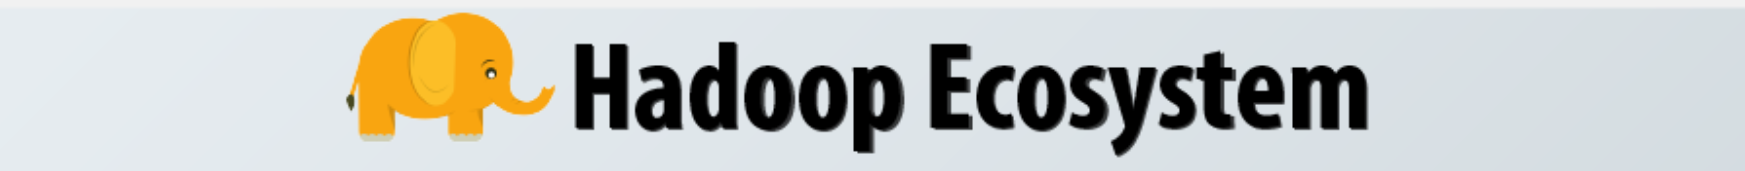

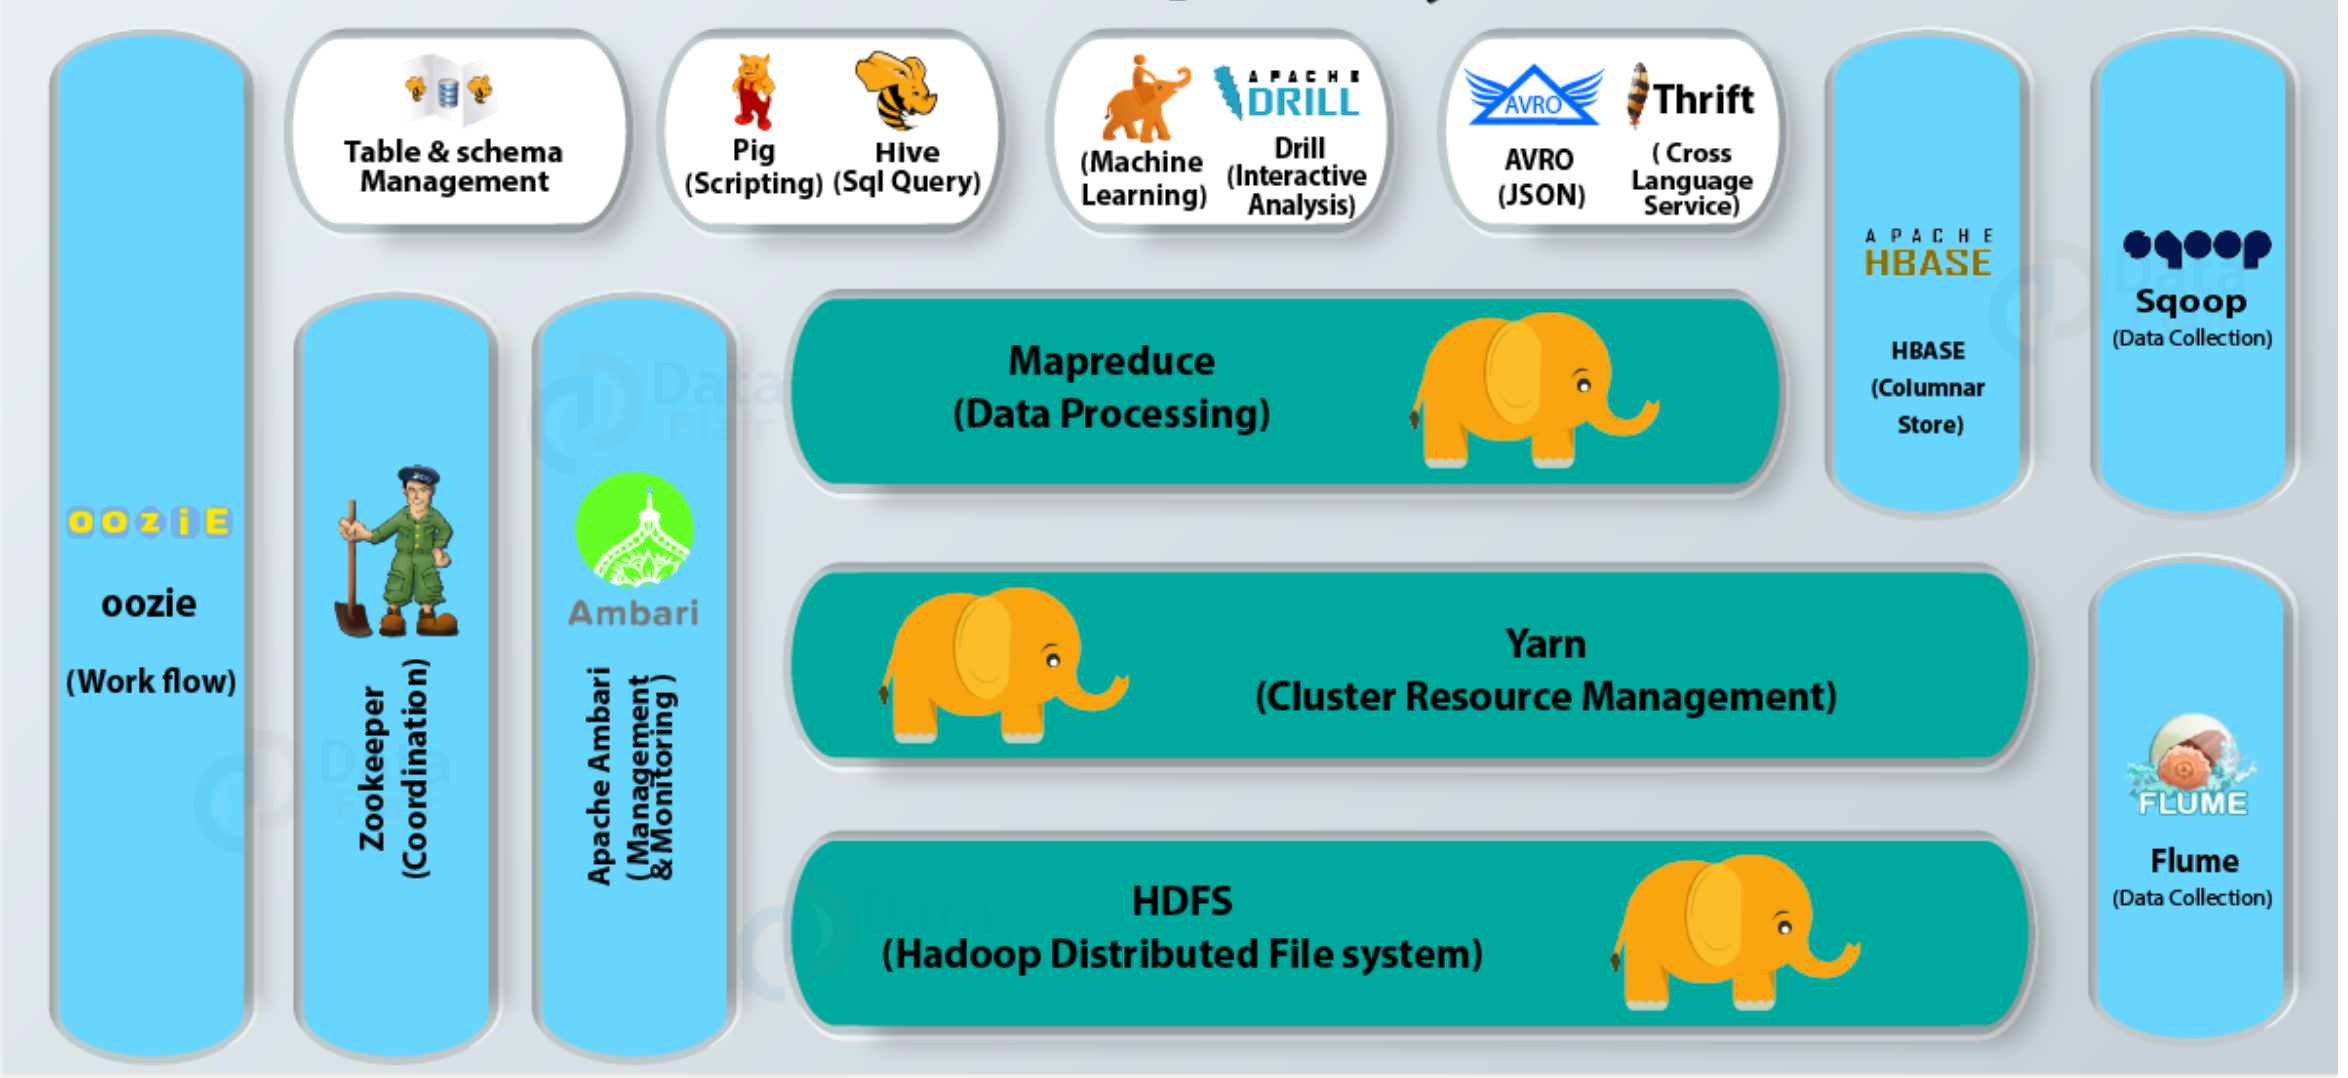

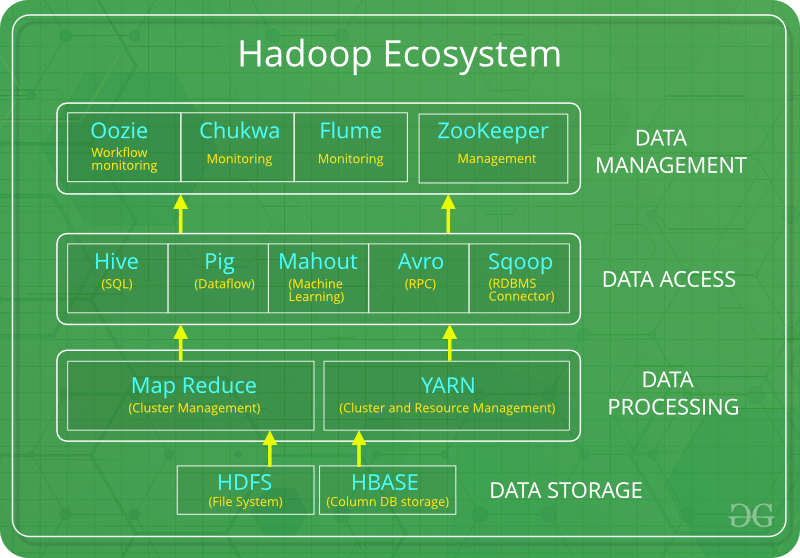

Following are the components that collectively form a Hadoop ecosystem:

- **HDFS:** Hadoop Distributed File System
- **YARN:** Yet Another Resource Negotiator
- **MapReduce:** Programming based Data Processing
- **Spark:** In-Memory data processing
- **PIG, HIVE:** Query based processing of data services
- **HBase:** NoSQL Database
- **Mahout, Spark MLLib:** Machine Learning algorithm libraries
- **Solar, Lucene:** Searching and Indexing
- **Zookeeper:** Managing cluster
- **Oozie:** Job Scheduling

Apache Hadoop consists of two sub-projects –  
1. **Hadoop MapReduce:** MapReduce is a computational model and software framework for writing applications which are run on Hadoop. These MapReduce programs are capable of processing enormous data in parallel on large clusters of computation nodes.
2. **HDFS (Hadoop Distributed File System):** HDFS takes care of the storage part of Hadoop applications. MapReduce applications consume data from HDFS. HDFS creates multiple replicas of data blocks and distributes them on compute nodes in a cluster. This distribution enables reliable and extremely rapid computations.


### Hadoop Architecture

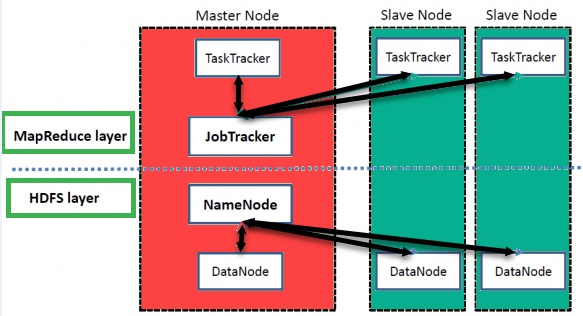

Hadoop has a Master-Slave Architecture for data storage and distributed data processing using MapReduce and HDFS methods.

**NameNode:**  
NameNode represented every files and directory which is used in the namespace

**DataNode:**  
DataNode helps you to manage the state of an HDFS node and allows you to interacts with the blocks

**MasterNode:**  
The master node allows you to conduct parallel processing of data using Hadoop MapReduce.

**Slave node:**  
The slave nodes are the additional machines in the Hadoop cluster which allows you to store data to conduct complex calculations. Moreover, all the slave node comes with Task Tracker and a DataNode. This allows you to synchronize the processes with the NameNode and Job Tracker respectively.  

In Hadoop, master or slave system can be set up in the cloud or on-premise


## Hadoop Distributed File System (HDFS):

- HDFS is the primary or major component of Hadoop ecosystem and is responsible for storing large data sets of structured or unstructured data across various nodes and thereby maintaining the metadata in the form of log files.
- HDFS consists of two core components i.e.
    1. Name node
    2. Data Node
- Name Node is the prime node which contains metadata (data about data) requiring comparatively fewer resources than the data nodes that stores the actual data. These data nodes are commodity hardware in the distributed environment. Undoubtedly, making Hadoop cost effective.
- HDFS maintains all the coordination between the clusters and hardware, thus working at the heart of the system.

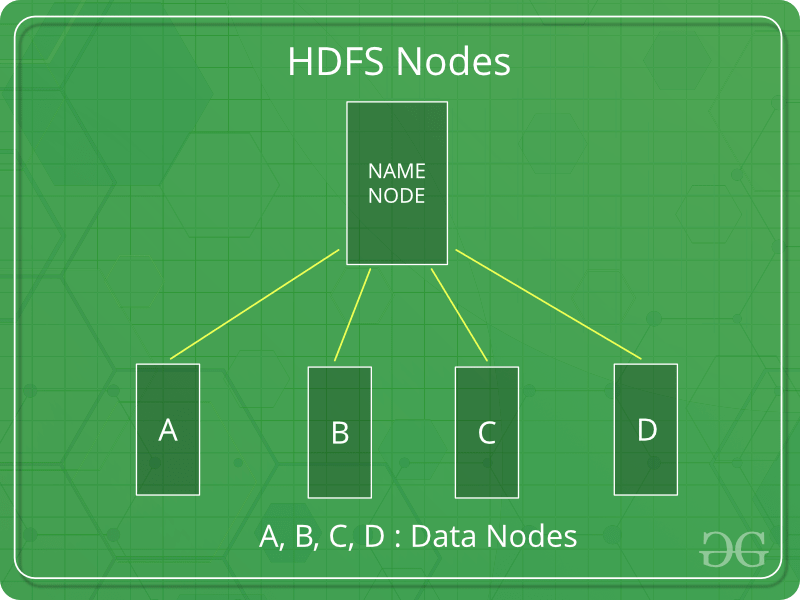

**1. NameNode**

It is also known as Master node. NameNode does not store actual data or dataset. NameNode stores Metadata i.e. number of blocks, their location, on which Rack, which Datanode the data is stored and other details. It consists of files and directories.

**Tasks of HDFS NameNode**

- Manage file system namespace.
- Regulates client’s access to files.
- Executes file system execution such as naming, closing, opening files and directories.


**2. DataNode**

It is also known as Slave. HDFS Datanode is responsible for storing actual data in HDFS. Datanode performs read and write operation as per the request of the clients. Replica block of Datanode consists of 2 files on the file system. The first file is for data and second file is for recording the block’s metadata. HDFS Metadata includes checksums for data. At startup, each Datanode connects to its corresponding Namenode and does handshaking. Verification of namespace ID and software version of DataNode take place by handshaking. At the time of mismatch found, DataNode goes down automatically.

**Tasks of HDFS DataNode**

DataNode performs operations like block replica creation, deletion, and replication according to the instruction of NameNode.
DataNode manages data storage of the system.


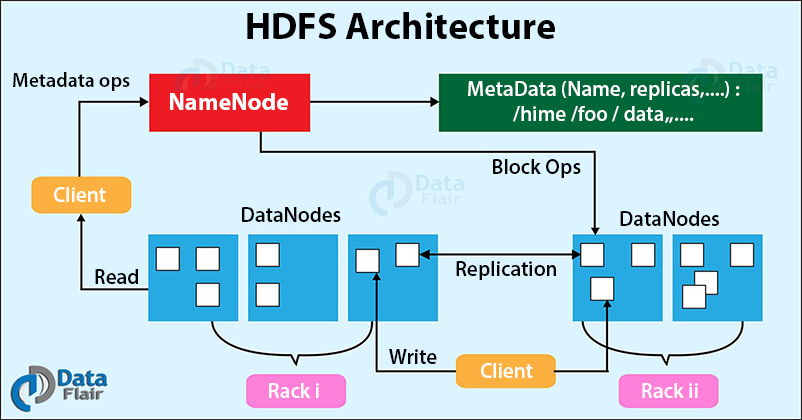

### Secondary Name Node

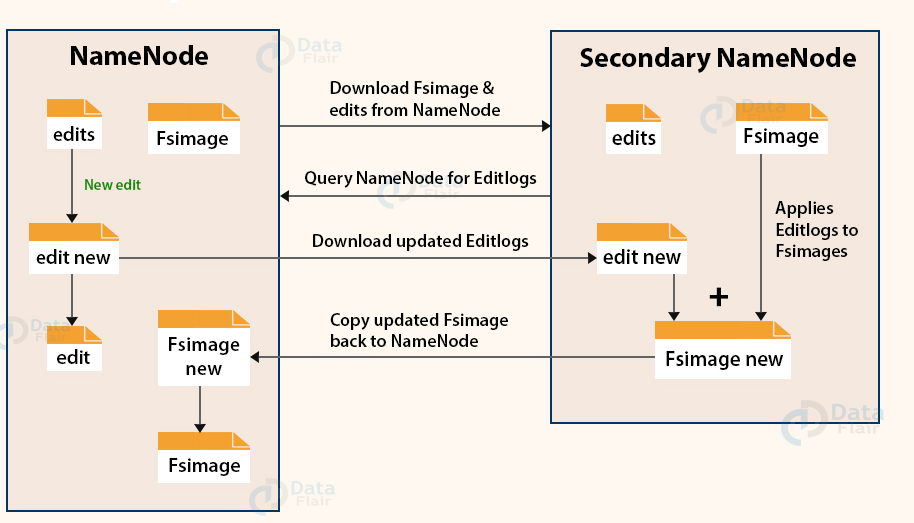

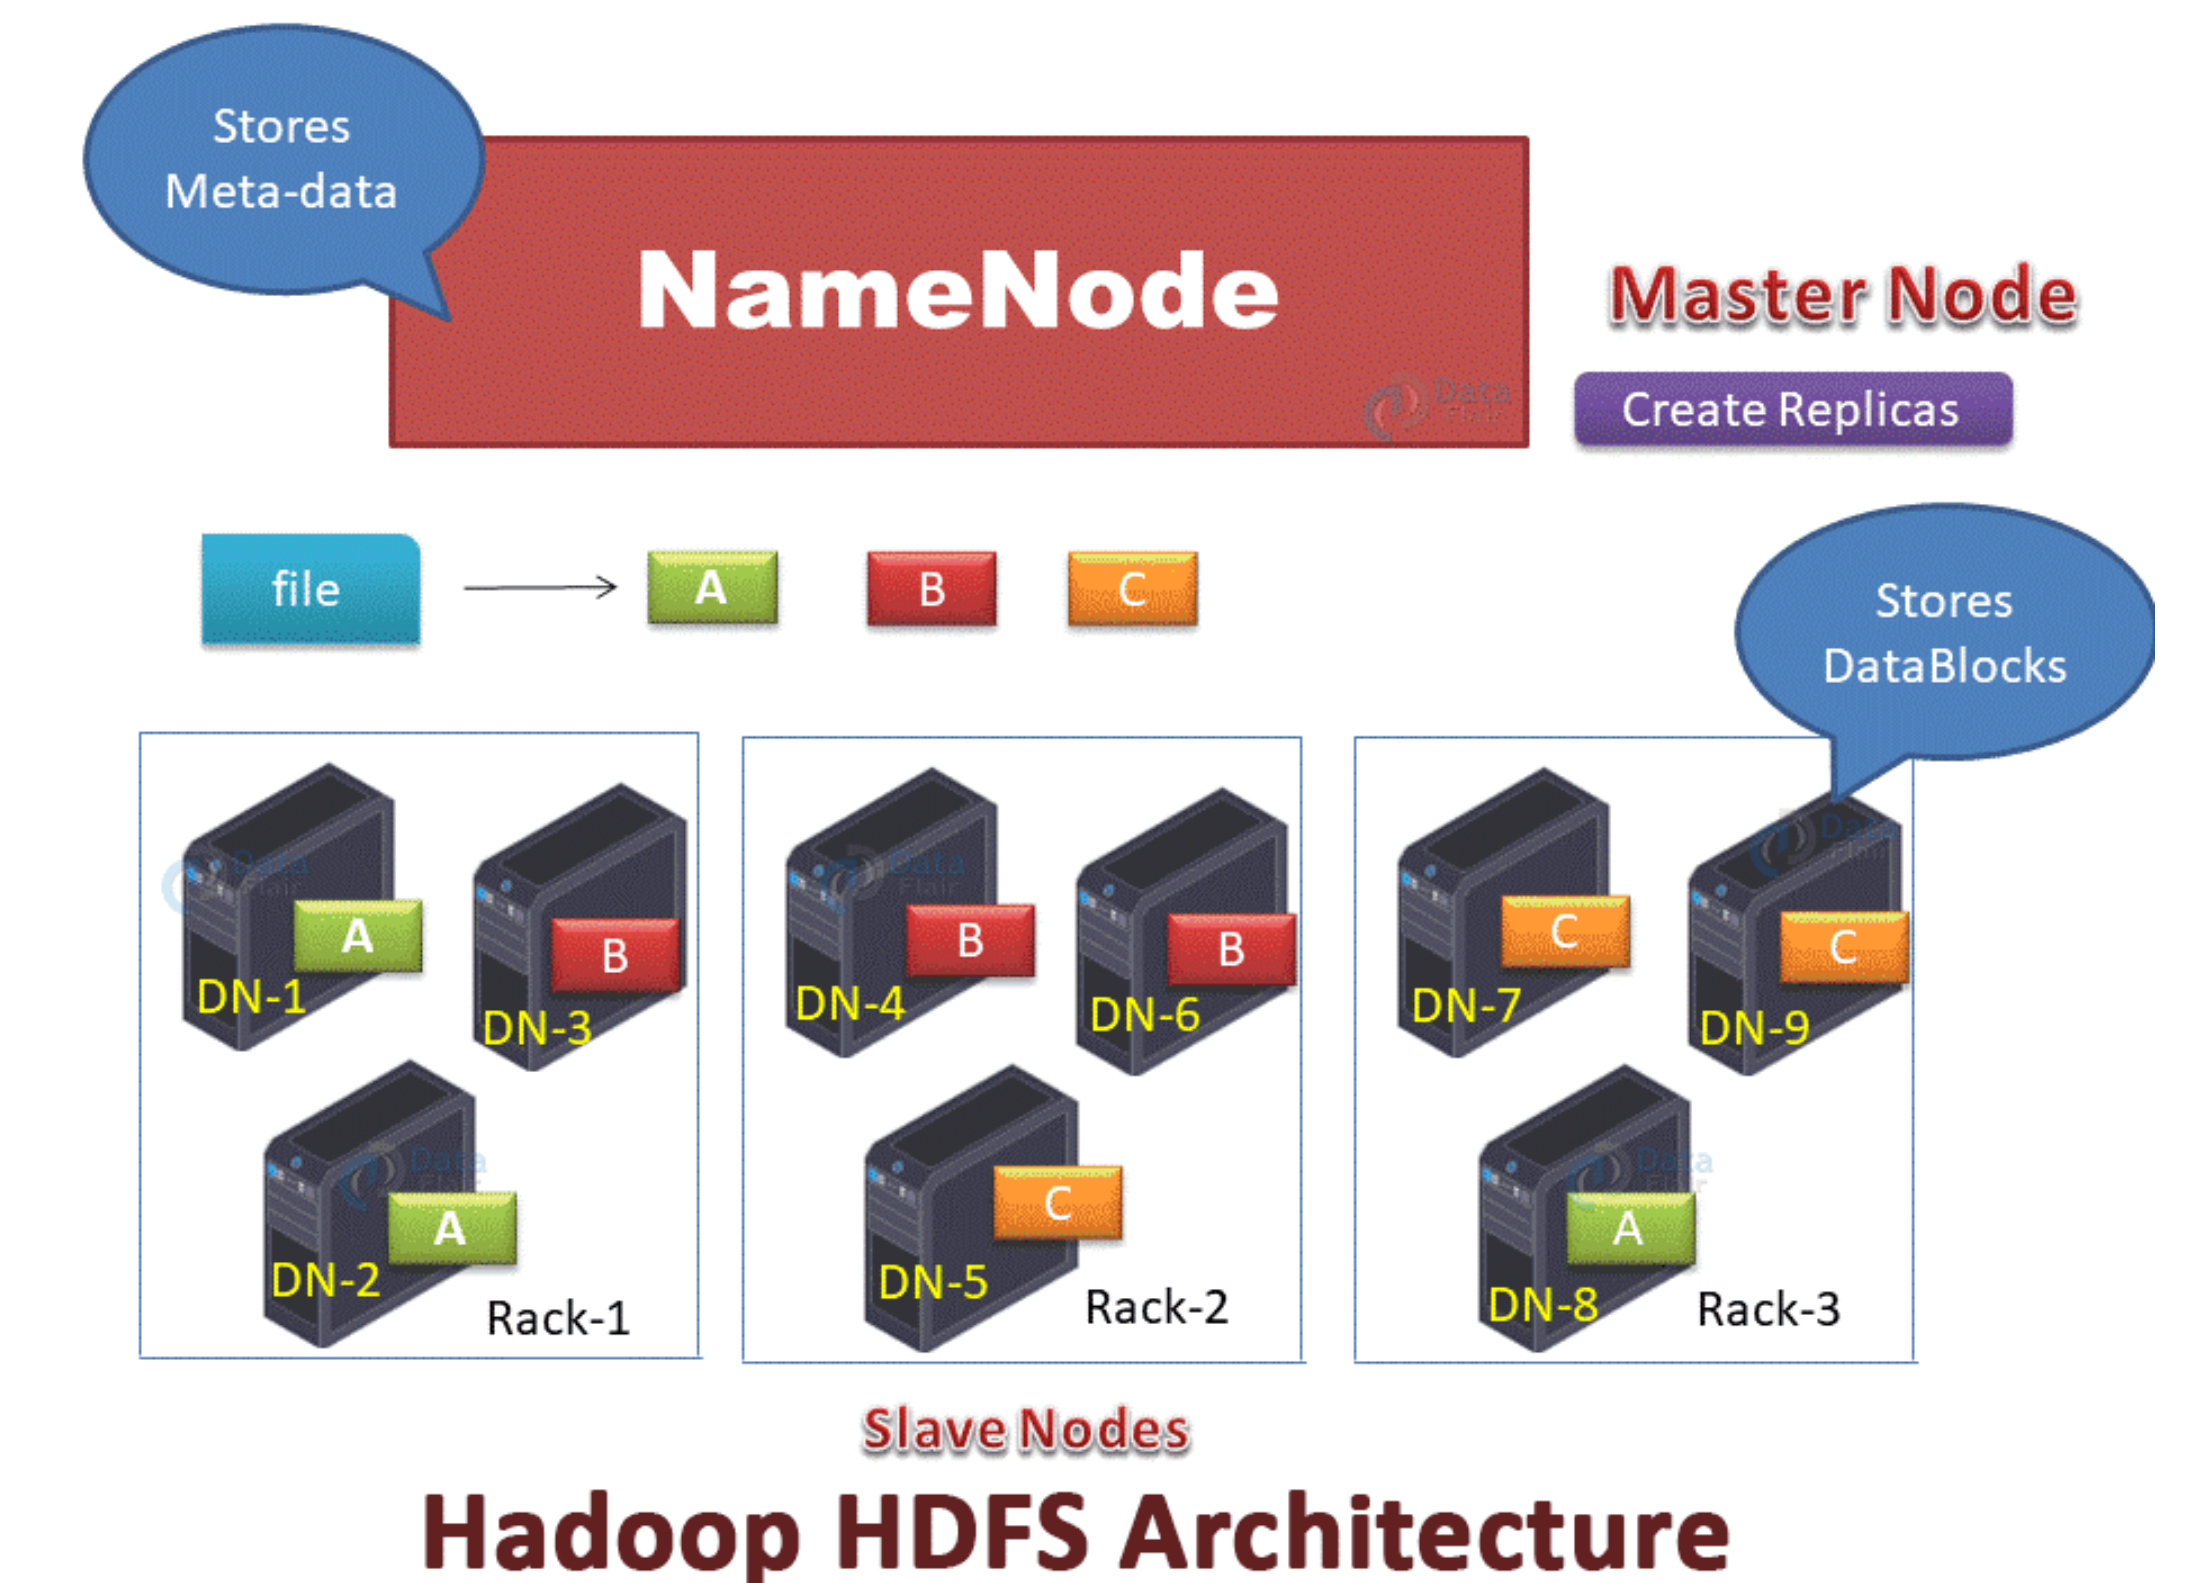

## What is MapReduce in Hadoop?

MapReduce is a software framework and programming model used for processing huge amounts of data. MapReduce program work in two phases, namely, Map and Reduce. Map tasks deal with splitting and mapping of data while Reduce tasks shuffle and reduce the data.  

The input to each phase is **key-value** pairs. In addition, every programmer needs to specify two functions: **map function** and **reduce function**.


### MapReduce Workflow

The whole process goes through four phases of execution namely, splitting, mapping, shuffling, and reducing.

MapReduce example–
Consider you have following input data for your MapReduce in Big data Program

`Welcome to Hadoop Class
Hadoop is good
Hadoop is bad`



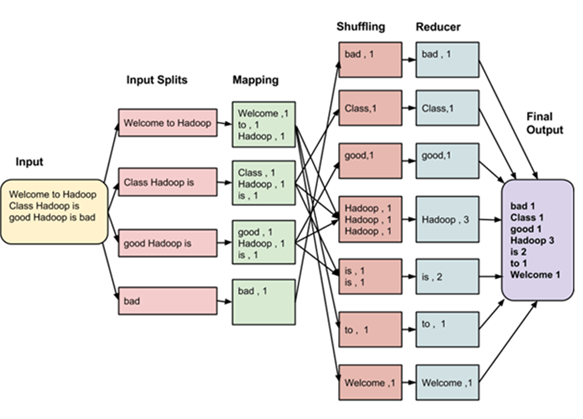

The final output of the MapReduce task is

|bad |1|
|---|---|
|Class|1|
|good|1|
|Hadoop|3|
|is|2|
|to |1|
|Welcome |1|


The data goes through the following phases of MapReduce in Big Data    

**Input Splits:**  
An input to a MapReduce in Big Data job is divided into fixed-size pieces called input splits. Input split is a chunk of the input that is consumed by a single map  

**Mapping**
This is the very first phase in the execution of map-reduce program. In this phase data in each split is passed to a mapping function to produce output values. In our example, a job of mapping phase is to count a number of occurrences of each word from input splits (more details about input-split is given below) and prepare a list in the form of <word, frequency>  

**Shuffling**    
This phase consumes the output of Mapping phase. Its task is to consolidate the relevant records from Mapping phase output. In our example, the same words are clubed together along with their respective frequency.  

**Reducing**    
In this phase, output values from the Shuffling phase are aggregated. This phase combines values from Shuffling phase and returns a single output value. In short, this phase summarizes the complete dataset.


**MapReduce Architecture in detail**  

- One map task is created for each split which then executes map function for each record in the split.

- It is always beneficial to have multiple splits because the time taken to process a split is small as compared to the time taken for processing of the whole input. When the splits are smaller, the processing is better to load balanced since we are processing the splits in parallel.

- However, it is also not desirable to have splits too small in size. When splits are too small, the overload of managing the splits and map task creation begins to dominate the total job execution time.

- For most jobs, it is better to make a split size equal to the size of an HDFS block (which is 128 MB, by default).

- Execution of map tasks results into writing output to a local disk on the respective node and not to HDFS.

- Reason for choosing local disk over HDFS is, to avoid replication which takes place in case of HDFS store operation.

- Map output is intermediate output which is processed by reduce tasks to produce the final output.

- Once the job is complete, the map output can be thrown away. So, storing it in HDFS with replication becomes overkill.

- In the event of node failure, before the map output is consumed by the reduce task, Hadoop reruns the map task on another node and re-creates the map output.

- Reduce task doesn't work on the concept of data locality. An output of every map task is fed to the reduce task. Map output is transferred to the machine where reduce task is running.

- On this machine, the output is merged and then passed to the user-defined reduce function.

- Unlike the map output, reduce output is stored in HDFS (the first replica is stored on the local node and other replicas are stored on off-rack nodes). So, writing the reduce output

Example 2:
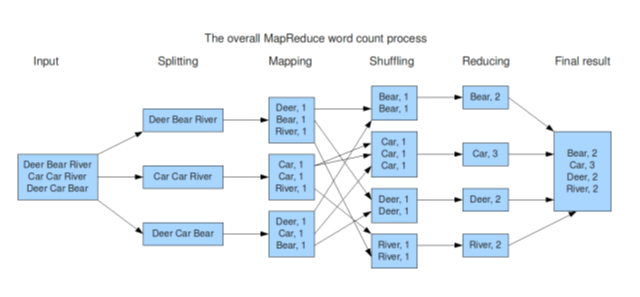

## Apache Spark

Industries are using Hadoop extensively to analyze their data sets. The reason is that Hadoop framework is based on a simple programming model (MapReduce) and it enables a computing solution that is scalable, flexible, fault-tolerant and cost effective. Here, the main concern is to maintain speed in processing large datasets in terms of waiting time between queries and waiting time to run the program.  

Spark was introduced by Apache Software Foundation for speeding up the Hadoop computational computing software process.

As against a common belief, **`Spark is not a modified version of Hadoop`** and is not, really, dependent on Hadoop because it has its own cluster management. Hadoop is just one of the ways to implement Spark.  

Spark uses Hadoop in two ways – one is **storage** and second is **processing**. Since Spark has its own cluster management computation, it uses Hadoop for storage purpose only.  


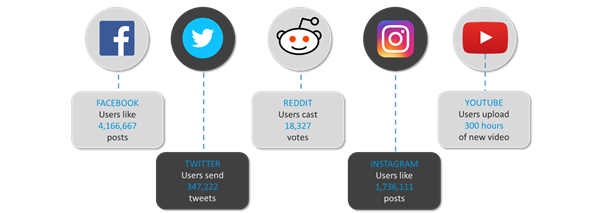

Figure: Amount of data generated every minute

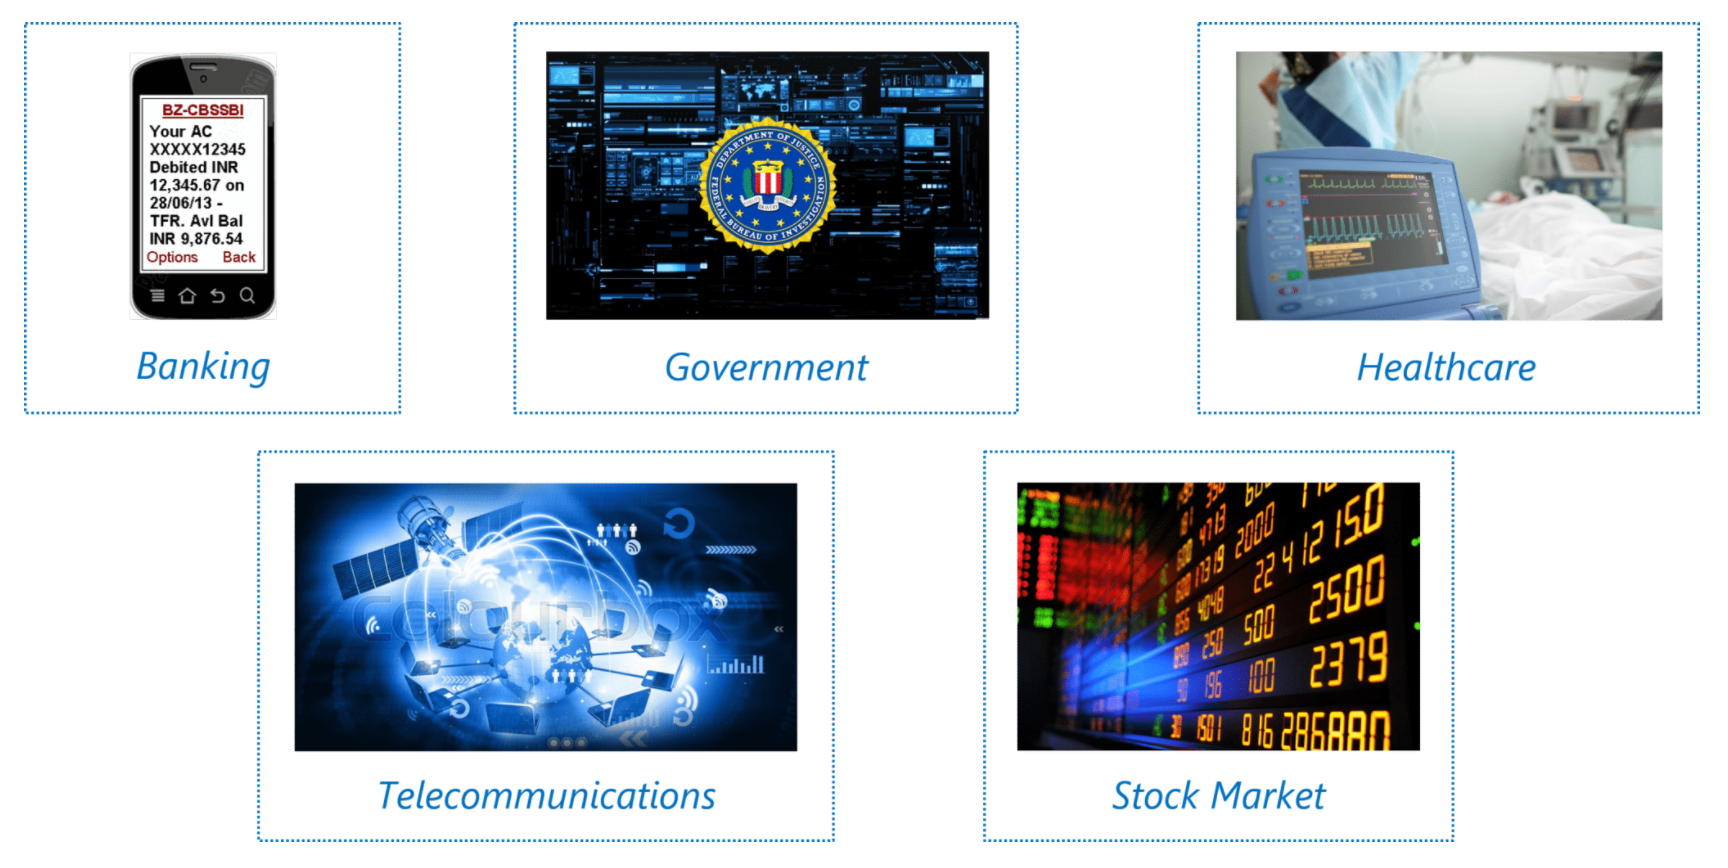

Figure: Examples of Real Time Analytics

### Why Spark when Hadoop is already there?

Hadoop is based on the concept of batch processing where the processing happens of blocks of data that have already been stored over a period of time. At the time, Hadoop broke all the expectations with the revolutionary MapReduce framework in 2005. Hadoop MapReduce is the best framework for processing data in batches.  

This went on until 2014, till Spark overtook Hadoop. The USP for Spark was that it could process data in real time and was about 100 times faster than Hadoop MapReduce in batch processing large data sets.  

The following figure gives a detailed explanation of the differences between processing in Spark and Hadoop.


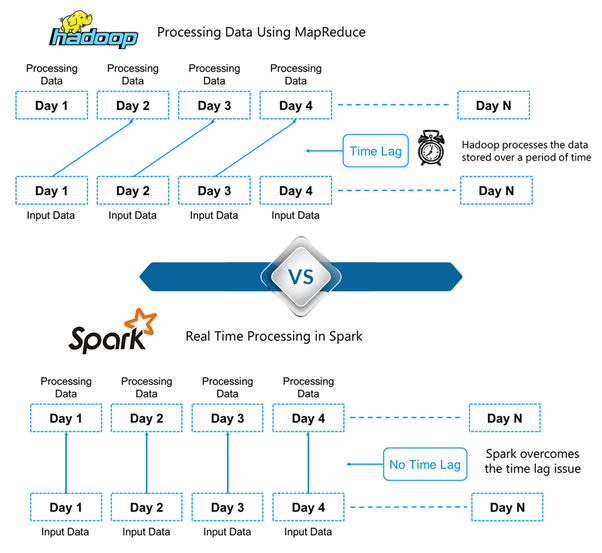

Figure: Differences between Hadoop and Spark

Here, we can draw out one of the key differentiators between Hadoop and Spark. Hadoop is based on batch processing of big data. This means that the data is stored over a period of time and is then processed using Hadoop. Whereas in Spark, processing can take place in real-time. This real-time processing power in Spark helps us to solve the use cases of Real Time Analytics we saw in the previous section. Alongside this, Spark is also able to do batch processing 100 times faster than that of Hadoop MapReduce (Processing framework in Apache Hadoop). Therefore, Apache Spark is the go-to tool for big data processing in the industry.

### What is Apache Spark?

Apache Spark is an open-source cluster computing framework for real-time processing. Spark provides an interface for programming entire clusters with implicit data parallelism and fault-tolerance. 


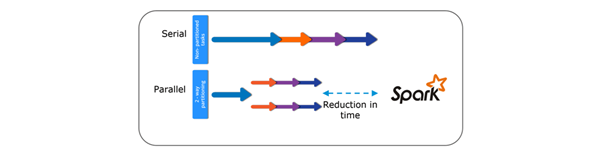

Figure: Real Time Processing in Apache Spark 

It was built on top of Hadoop MapReduce and it extends the MapReduce model to efficiently use more types of computations.

### Features of Apache Spark

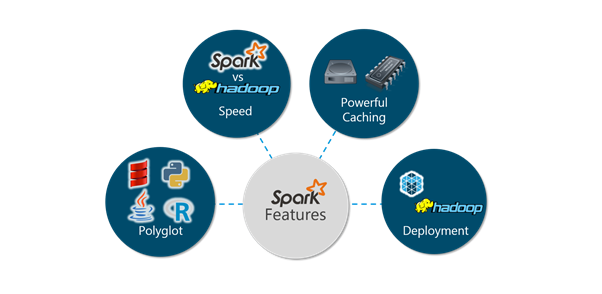

**Polyglot:**  
Spark provides high-level APIs in Java, Scala, Python and R. Spark code can be written in any of these four languages. It provides a shell in Scala and Python. The Scala shell can be accessed through ./bin/spark-shell and Python shell through ./bin/pyspark from the installed directory.	 

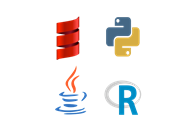

**Speed:**  
Spark runs up to 100 times faster than Hadoop MapReduce for large-scale data processing. Spark is able to achieve this speed through controlled partitioning. It manages data using partitions that help parallelize distributed data processing with minimal network traffic.

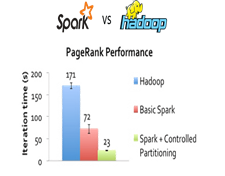

**Lazy Evaluation:**  
Apache Spark delays its evaluation till it is absolutely necessary. This is one of the key factors contributing to its speed. For transformations, Spark adds them to a DAG (Directed Acyclic Graph) of computation and only when the driver requests some data, does this DAG actually gets executed.
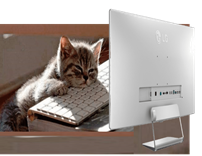

**Real Time Computation:**  
Spark’s computation is real-time and has low latency because of its in-memory computation. Spark is designed for massive scalability and the Spark team has documented users of the system running production clusters with thousands of nodes and supports several computational models.

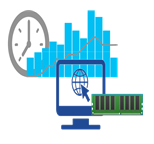

**Machine Learning:**  
Spark’s MLlib is the machine learning component which is handy when it comes to big data processing. It eradicates the need to use multiple tools, one for processing and one for machine learning. Spark provides data engineers and data scientists with a powerful, unified engine that is both fast and easy to use.

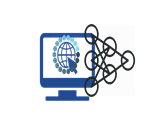

### Getting Started With Spark

**Spark Shell:**  

Spark’s shell provides a simple way to learn the API, as well as a powerful tool to analyze data interactively.

**Spark Session:**  

In earlier versions of Spark, Spark Context was the entry point for Spark. For every other API, we needed to use different contexts. For streaming, we needed StreamingContext, for SQL sqlContext and for hive HiveContext. To solve this issue, SparkSession came into the picture. It is essentially a combination of SQLContext, HiveContext and future StreamingContext.

**Data Sources:**   

The Data Source API provides a pluggable mechanism for accessing structured data though Spark SQL. Data Source API is used to read and store structured and semi-structured data into Spark SQL. Data sources can be more than just simple pipes that convert data and pull it into Spark.

**RDD:**  

Resilient Distributed Dataset (RDD) is a fundamental data structure of Spark. It is an immutable distributed collection of objects. Each dataset in RDD is divided into logical partitions, which may be computed on different nodes of the cluster. RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.

**Dataset:**   

A Dataset is a distributed collection of data. A Dataset can be constructed from JVM objects and then manipulated using functional transformations (map, flatMap, filter, etc.). The Dataset API is available in Scala and Java.

**DataFrames:**   

A DataFrame is a Dataset organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood. DataFrames can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases or existing RDDs.

### Using Spark with Hadoop
The best part of Spark is its compatibility with Hadoop. As a result, this makes for a very powerful combination of technologies. Here, we will be looking at how Spark can benefit from the best of Hadoop.

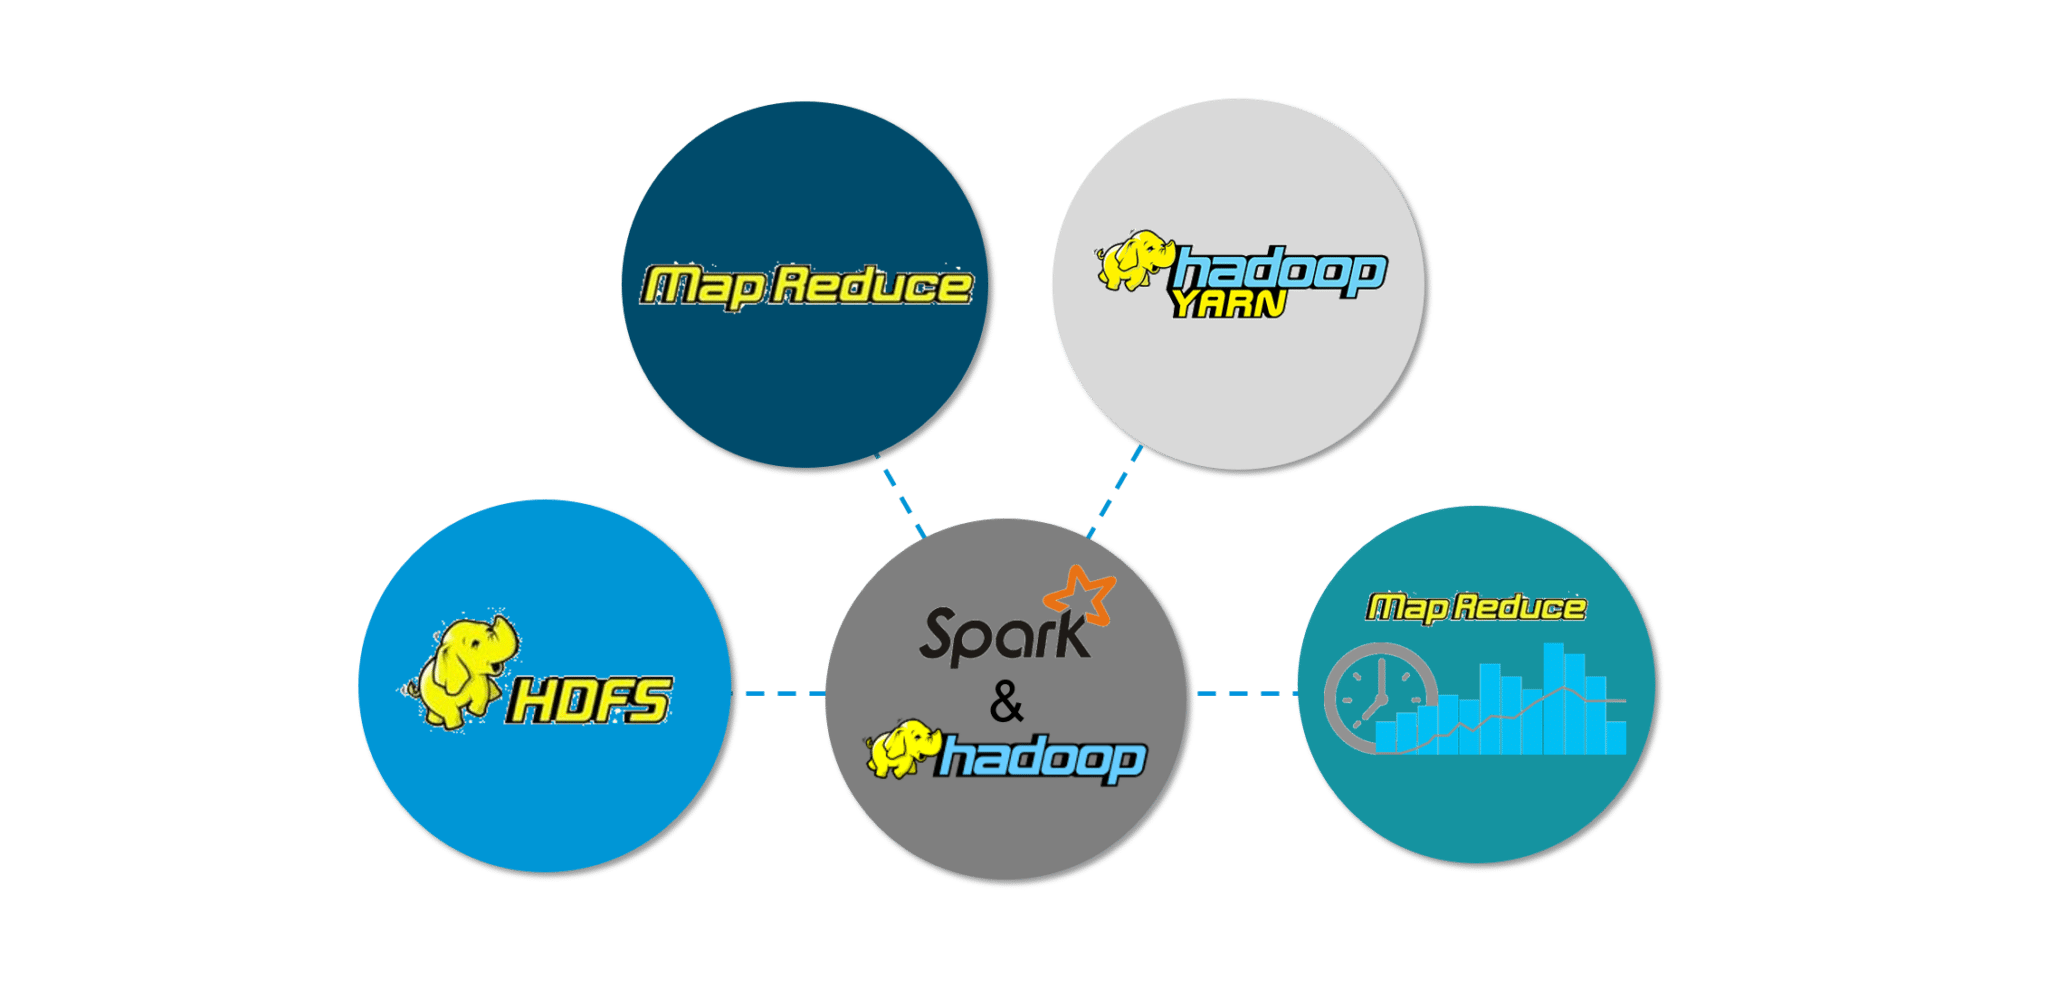

Hadoop components can be used alongside Spark in the following ways:

- **HDFS:** Spark can run on top of HDFS to leverage the distributed replicated storage.
- **MapReduce:** Spark can be used along with MapReduce in the same Hadoop cluster or separately as a processing framework.
- **YARN:** Spark applications can be made to run on YARN (Hadoop NextGen).
- **Batch & Real Time Processing:** MapReduce and Spark are used together where MapReduce is used for batch processing and Spark for real-time processing.

### Spark Components
Spark components are what make Apache Spark fast and reliable. A lot of these Spark components were built to resolve the issues that cropped up while using Hadoop MapReduce. Apache Spark has the following components:

- Spark Core
- Spark Streaming
- Spark SQL
- GraphX
- MLlib (Machine Learning)

#### Spark Core
Spark Core is the base engine for large-scale parallel and distributed data processing. The core is the distributed execution engine and the Java, Scala, and Python APIs offer a platform for distributed ETL application development. Further, additional libraries which are built atop the core allow diverse workloads for streaming, SQL, and machine learning. It is responsible for:

- Memory management and fault recovery
- Scheduling, distributing and monitoring jobs on a cluster
I- nteracting with storage systems

#### Spark Streaming
Spark Streaming is the component of Spark which is used to process real-time streaming data. Thus, it is a useful addition to the core Spark API. It enables high-throughput and fault-tolerant stream processing of live data streams. The fundamental stream unit is DStream which is basically a series of RDDs (Resilient Distributed Datasets) to process the real-time data.

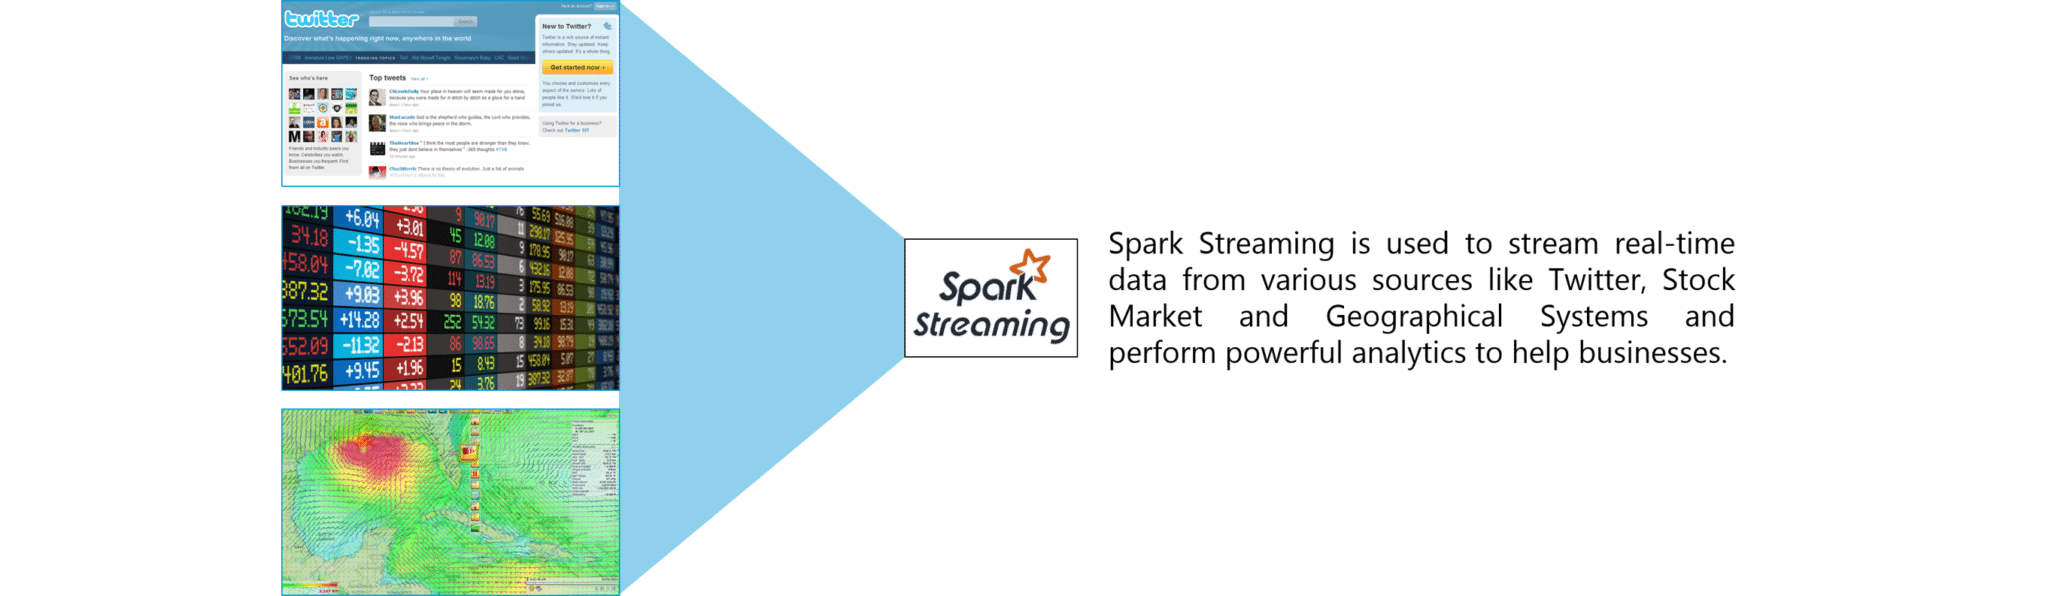

Figure: Spark Streaming

#### Spark SQL
Spark SQL is a new module in Spark which integrates relational processing with Spark’s functional programming API. It supports querying data either via SQL or via the Hive Query Language. For those of you familiar with RDBMS, Spark SQL will be an easy transition from your earlier tools where you can extend the boundaries of traditional relational data processing.   

Spark SQL integrates relational processing with Spark’s functional programming. Further, it provides support for various data sources and makes it possible to weave SQL queries with code transformations thus resulting in a very powerful tool.

The following are the four libraries of Spark SQL.  

- Data Source API
- DataFrame API
- Interpreter & Optimizer
- SQL Service

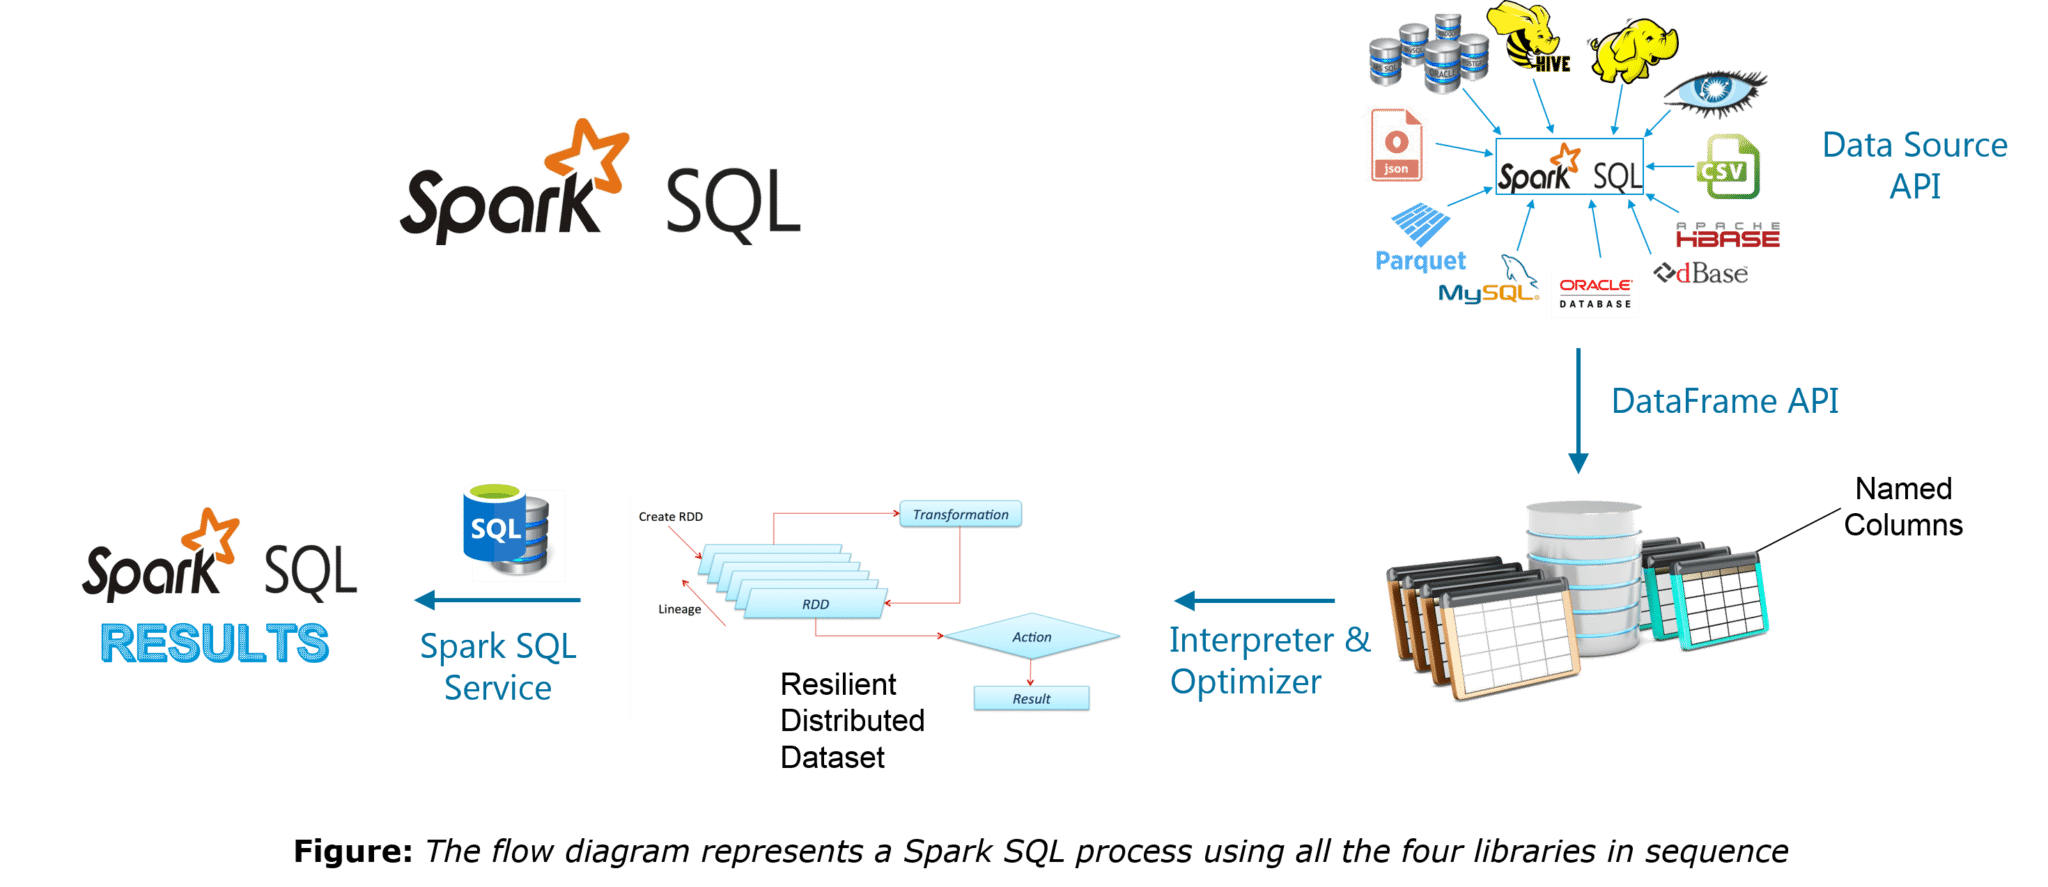

#### GraphX
GraphX is the Spark API for graphs and graph-parallel computation. Thus, it extends the Spark RDD with a Resilient Distributed Property Graph.  

The property graph is a directed multigraph which can have multiple edges in parallel. Every edge and vertex have user defined properties associated with it. Here, the parallel edges allow multiple relationships between the same vertices. At a high-level, GraphX extends the Spark RDD abstraction by introducing the Resilient Distributed Property Graph: a directed multigraph with properties attached to each vertex and edge.  

To support graph computation, GraphX exposes a set of fundamental operators (e.g., subgraph, joinVertices, and mapReduceTriplets) as well as an optimized variant of the Pregel API. In addition, GraphX includes a growing collection of graph algorithms and builders to simplify graph analytics tasks.  
 

#### MlLib (Machine Learning)
MLlib stands for Machine Learning Library. Spark MLlib is used to perform machine learning in Apache Spark.  

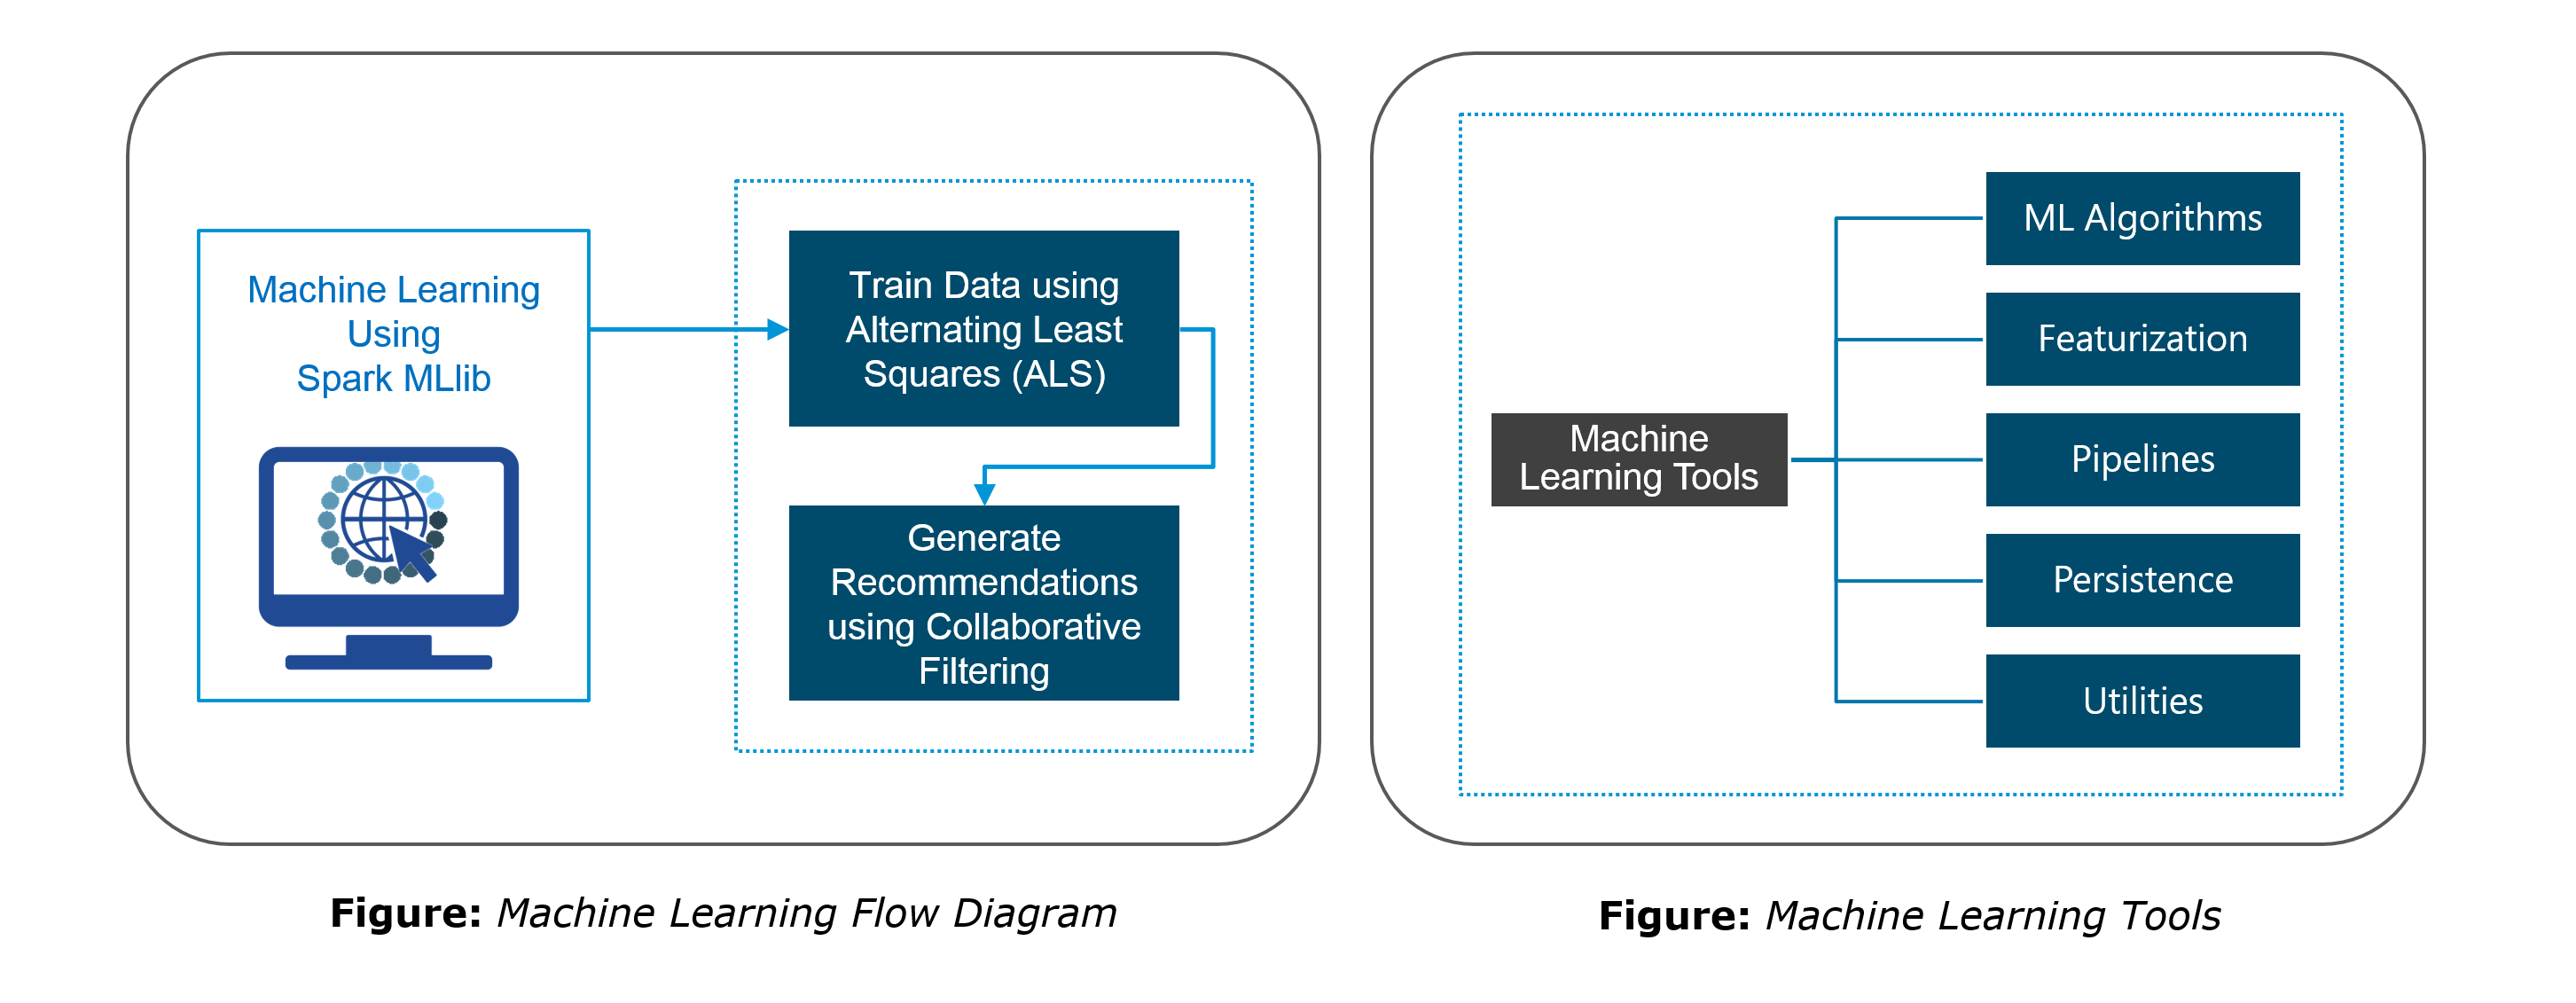


## Resilient Distributed Datasets

### What is Apache Spark RDD?

RDD stands for **“Resilient Distributed Dataset”**. It is the fundamental data structure of Apache Spark. RDD in Apache Spark is an immutable collection of objects which computes on the different node of the cluster.

Decomposing the name RDD:
- **Resilient**, i.e. fault-tolerant with the help of RDD lineage graph(DAG) and so able to recompute missing or damaged partitions due to node failures.
- **Distributed**, since Data resides on multiple nodes.
- **Dataset** represents records of the data you work with. The user can load the data set externally which can be either JSON file, CSV file, text file or database via JDBC with no specific data structure.

Hence, each and every dataset in RDD is logically partitioned across many servers so that they can be computed on different nodes of the cluster. RDDs are fault tolerant i.e. It posses self-recovery in the case of failure.

There are three ways to create RDDs in Spark such as – Data in stable storage, other RDDs, and parallelizing already existing collection in driver program. 

Spark RDD can also be cached and manually partitioned. Caching is beneficial when we use RDD several times. And manual partitioning is important to correctly balance partitions. Generally, smaller partitions allow distributing RDD data more equally, among more executors. Hence, fewer partitions make the work easy.

Programmers can also call a persist method to indicate which RDDs they want to reuse in future operations. Spark keeps persistent RDDs in memory by default, but it can spill them to disk if there is not enough RAM. Users can also request other persistence strategies, such as storing the RDD only on disk or replicating it across machines, through flags to persist.

### Why do we need RDD in Spark?

The key motivations behind the concept of RDD are-
- Iterative algorithms.
- Interactive data mining tools.
- DSM (Distributed Shared Memory) is a very general abstraction, but this generality makes it harder to implement in an efficient and fault tolerant manner on commodity clusters. Here the need of RDD comes into the picture.
- In distributed computing system data is stored in intermediate stable distributed store such as HDFS or Amazon S3. This makes the computation of job slower since it involves many IO operations, replications, and serializations in the process.


In first two cases we keep data in-memory, it can improve performance by an order of magnitude.  

The main challenge in designing RDD is defining a program interface that provides fault tolerance efficiently. To achieve fault tolerance efficiently, RDDs provide a restricted form of shared memory, based on coarse-grained transformation rather than fine-grained updates to shared state.  

Spark exposes RDD through language integrated API. In integrated API each data set is represented as an object and transformation is involved using the method of these objects.  


Apache Spark evaluates RDDs lazily. It is called when needed, which saves lots of time and improves efficiency. The first time they are used in an action so that it can pipeline the transformation.   

### Spark RDD Operations

RDD in Apache Spark supports two types of operations:
- Transformation
- Actions

**i. Transformations**  
Spark RDD Transformations are functions that take an RDD as the input and produce one or many RDDs as the output. They do not change the input RDD (since RDDs are immutable and hence one cannot change it), but always produce one or more new RDDs by applying the computations they represent e.g. Map(), filter(), reduceByKey() etc.  

Transformations are lazy operations on an RDD in Apache Spark. It creates one or many new RDDs, which executes when an Action occurs. Hence, Transformation creates a new dataset from an existing one.  
Certain transformations can be pipelined which is an optimization method, that Spark uses to improve the performance of computations. There are two kinds of transformations: **narrow transformation, wide transformation.**

**a. Narrow Transformations**  
It is the result of map, filter and such that the data is from a single partition only, i.e. it is self-sufficient. An output RDD has partitions with records that originate from a single partition in the parent RDD. Only a limited subset of partitions used to calculate the result.

Spark groups narrow transformations as a stage known as **pipelining.** 

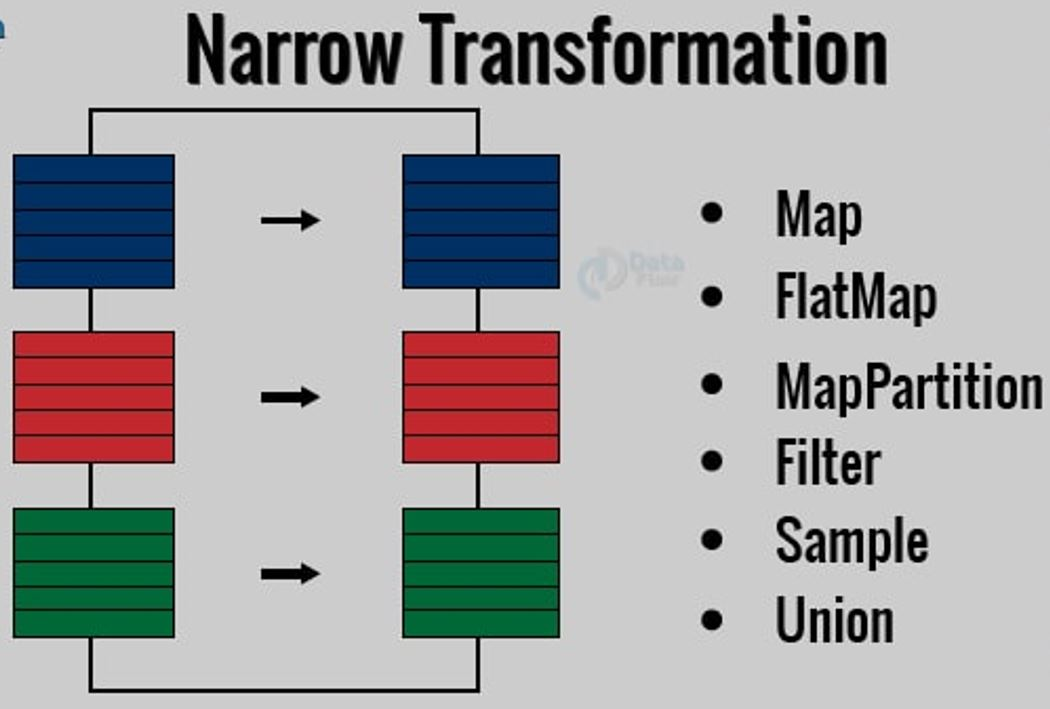

**b. Wide Transformations**  
It is the result of groupByKey() and reduceByKey() like functions. The data required to compute the records in a single partition may live in many partitions of the parent RDD. Wide transformations are also known as shuffle transformations because they may or may not depend on a shuffle.

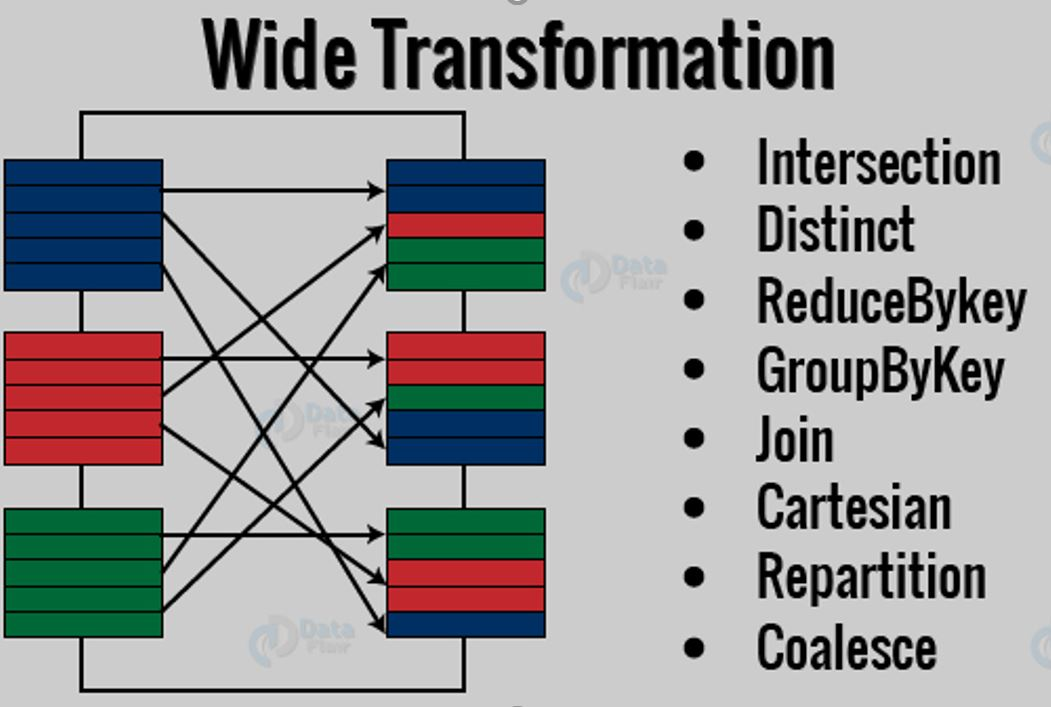

**ii. Actions**  
An Action in Spark returns final result of RDD computations. It triggers execution using lineage graph to load the data into original RDD, carry out all intermediate transformations and return final results to Driver program or write it out to file system. Lineage graph is dependency graph of all parallel RDDs of RDD.  

Actions are RDD operations that produce non-RDD values. They materialize a value in a Spark program. An Action is one of the ways to send result from executors to the driver. First(), take(), reduce(), collect(), the count() is some of the Actions in spark.  

Using transformations, one can create RDD from the existing one. But when we want to work with the actual dataset, at that point we use Action. When the Action occurs it does not create the new RDD, unlike transformation. Thus, actions are RDD operations that give no RDD values. Action stores its value either to drivers or to the external storage system. It brings laziness of RDD into motion.  

### Limitation of Spark RDD

 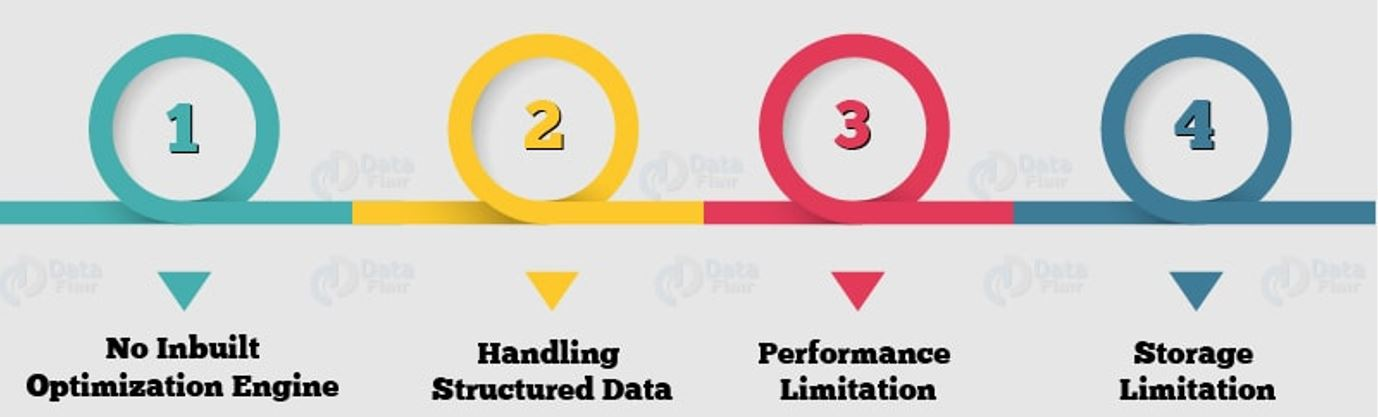

**i. No inbuilt optimization engine**    
When working with structured data, RDDs cannot take advantages of Spark’s advanced optimizers including catalyst optimizer and Tungsten execution engine. Developers need to optimize each RDD based on its attributes.

**ii. Handling structured data**    
Unlike Dataframe and datasets, RDDs don’t infer the schema of the ingested data and requires the user to specify it.  

**iii. Performance limitation**
Being in-memory JVM objects, RDDs involve the overhead of Garbage Collection and Java Serialization which are expensive when data grows.  

**iv. Storage limitation**   
RDDs degrade when there is not enough memory to store them. One can also store that partition of RDD on disk which does not fit in RAM. As a result, it will provide similar performance to current data-parallel systems.  


### When to use RDDs?
Consider these scenarios or common use cases for using RDDs when:
- you want low-level transformation and actions and control on your dataset;
- your data is unstructured, such as media streams or streams of text;
- you want to manipulate your data with functional programming constructs than domain specific expressions;
- you don’t care about imposing a schema, such as columnar format, while processing or accessing data attributes by name or column; and
- you can forgo some optimization and performance benefits available with DataFrames and Datasets for structured and semi-structured data.


### Installing PySpark

PySpark, as you can imagine, is the Python API of Apache Spark. It’s the way we have to interact with the framework using Python. The installation is very simple. These are the steps:
- Install Java 8 or higher on your computer.
- Install Python (I recommend > Python 3.6 from Anaconda)
- Install PySpark:

In [ ]:
pip install pyspark==3.0.2

In [ ]:
pip install findspark 

In [ ]:
import findspark
findspark.init() 

To test your installation, go to your terminal and then open Python. Then write:

In [ ]:
import pyspark

If you don’t get an error, you are on the right path. To check the installed version of Spark write:

In [ ]:
pyspark.__version__

### Apache Spark ML model

Spark’s library for machine learning is called MLlib (Machine Learning library). It’s heavily based on Scikit-learn’s ideas on pipelines. In this library to create an ML model the basics concepts are:

- **DataFrame:** This ML API uses DataFrame from Spark SQL as an ML dataset, which can hold a variety of data types. E.g., a DataFrame could have different columns storing text, feature vectors, true labels, and predictions.

- **Transformer:** A Transformer is an algorithm that can transform one DataFrame into another DataFrame. E.g., an ML model is a Transformer that transforms a DataFrame with features into a DataFrame with predictions.

- **Estimator:** An Estimator is an algorithm which can be fit on a DataFrame to produce a Transformer. E.g., a learning algorithm is an Estimator which trains on a DataFrame and produces a model

- **Pipeline:** A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow

- **Parameter:** All Transformers and Estimators now share a common API for specifying parameters.

If you want to know more about the APIs and how they work check the [official documentation.](https://spark.apache.org/docs/latest/ml-pipeline.html)

For this example, we will use a `Titanic dataset`,

**Features**  
- survival - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### Loading the data into Spark

To load the data we are using Spark DataFrames. Spark it’s a little bit more complicated than Pandas. You can’t just do “import -> read_csv()”. You first need to start a Spark Session, to do that write:

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('Titanic Data') \
    .getOrCreate()

In [ ]:
spark

That means that you are using Spark locally with all the cores (that’s the *), with version 3.0.1 and the name of the session is “Titanic Data”. That think there the “Spark UI” will be useful when you are working with Spark, if you click it you’ll see:

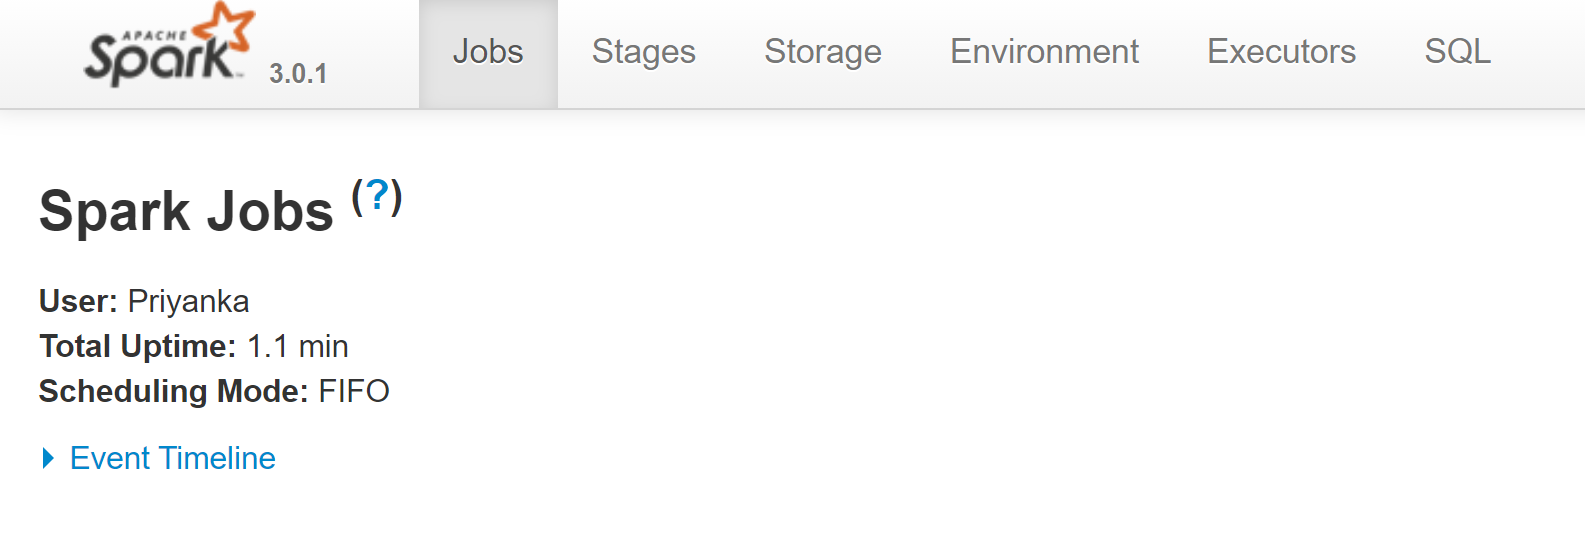

Now we have everything in place to read the data. 

In [ ]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("train.csv"))

You have created your first Spark DataFrame. To see the internals of the DataFrame write:

In [ ]:
df.show(5)

One good thing about using Python is that you can interact with Pandas easily. And to show our data in a prettier format you can write:

In [ ]:
df.toPandas()

You can only do this if the data you are working with is small enough, because when you do “toPandas()” you are getting all the data at once, and it won’t be distributed in that cell. So it will have to fit in Memory.

#### Checking information about your data

In [ ]:
# How many rows we have
df.count()

In [ ]:
# The names of our columns
df.columns

In [ ]:
# Types of our columns
df.dtypes

And finally some stats about our data:

In [ ]:
# Basics stats from our columns
df.describe().toPandas()

#### Data preparation and feature engineering
One of the things we noticed from the data exploration from above was that all the columns were of String type. But that doesn’t seem right. Some of them should be numeric. So we are going to cast them. 

Also because of time I’m only selecting a few variables for modeling so we don’t have to deal with the whole dataset:

In [ ]:
from pyspark.sql.functions import col
dataset = df.select(col('Survived').cast('float'),
                         col('Pclass').cast('float'),
                         col('Sex'),
                         col('Age').cast('float'),
                         col('Fare').cast('float'),
                         col('Embarked')
                        )
dataset.show()

In [ ]:
from pyspark.sql.functions import isnull, when, count, col
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

We see that we also have null values in some columns, so we will just eliminate them:

In [ ]:
dataset = dataset.replace('?', None).dropna(how='any')

Now, the Spark ML library only works with numeric data. But we still want to use the Sex and the Embarked column. For that, we will need to encode them. To do it let’s use something called the [StringIndexer:](https://spark.apache.org/docs/latest/ml-features#stringindexer)

In [ ]:
from pyspark.ml.feature import StringIndexer
dataset = StringIndexer(
    inputCol='Sex', 
    outputCol='Gender', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset = StringIndexer(
    inputCol='Embarked', 
    outputCol='Boarded', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset.show()

As you can see we’ve created two new columns “Gender” and “Boarded” that contain the same information as “Sex” and “Embarked” but now they are numeric. Let’s do a final check for our data types:

In [ ]:
dataset.dtypes

So all the columns we want are numeric. We now have to get rid of the old columns “Sex” and “Embarked” because we won’t be using them:

In [ ]:
# Drop unnecessary columns
dataset = dataset.drop('Sex')
dataset = dataset.drop('Embarked')
dataset.show()

Jut one step left before going into the machine learning part. Spark actually works to predict with a column with all the features smashed together into a list-like structure. For example, if you have the features:

In [ ]:
+--------+------+----+-------+------+-------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|
+--------+------+----+-------+------+-------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|
+--------+------+----+-------+------+-------+

And you want to predict “Survived”, you need to combine the information of the columns “Pclass”, “Age”, “Fare”, “Gender” and “Boarded” into one column. We normally call that column features and it should look like this:

In [ ]:
+--------+------+----+-------+------+-------+----------------------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|    features         |
+--------+------+----+-------+------+-------+----------------------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|[3.0, 22.0, 7.25, 0, 0] |
+--------+------+----+-------+------+-------+----------------------+

As you can see the new column features contain the same information from all of our features but in a list-like object. To do that in Spark we use the [VectorAssembler:](https://spark.apache.org/docs/latest/ml-features#vectorassembler)

In [ ]:
# Assemble all the features with VectorAssembler
required_features = ['Pclass',
                    'Age',
                    'Fare',
                    'Gender',
                    'Boarded'
                   ]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)

In [ ]:
transformed_data.show()

#### Modeling

Modeling is important but without all the previous steps it would be impossible. 
Before modeling let’s do the usual splitting between training and testing:

In [ ]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In this case, build and fit an ML model to our dataset to predict the “Survived” columns with all the other ones. We will be using a Random Forest Classifier. 

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='Survived', 
                            featuresCol='features',
                            maxDepth=5)

In [ ]:
model = rf.fit(training_data)

This will give us something called a transformer. And finally, we predict using the test dataset:

In [ ]:
predictions = model.transform(test_data)

In [ ]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='Survived', 
    predictionCol='prediction', 
    metricName='accuracy')

In [ ]:
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy) 

In [ ]:
print("Test Error = %g" % (1.0 - accuracy))

#stop a spark session
spark.stop()

Our basic model is giving us an accuracy of 0.827. Not bad at all.  

It should be noted that we have to much more to actually build good ML model, like cross-validation, feature selection, we also have to test more models, etc.

**Spark ML Library Documentation:**  
https://spark.apache.org/docs/latest/sql-getting-started.html  
https://spark.apache.org/docs/latest/ml-features 

## Broadcasting and Accumulators

**1. Objective**

For parallel processing, Apache Spark uses shared variables. A copy of shared variable goes on each node of the cluster when the driver sends a task to the executor on the cluster, so that it can be used for performing tasks. There are 2 types of Shared Variables: **Broadcast** & **Accumulator**.


**2. PySpark Broadcast and Accumulator**<br>
Generally, while functions are called, it executes on the specific remote cluster node. Usually, it works on separate copies of all the variables those we use in functions. These specific variables are precisely copied to each machine. Also, on the remote machine, no updates to the variables sent back to the driver program. Therefore, it would be inefficient to support general, read-write shared variables across tasks.

However, Spark (and thus PySpark) supports 2 types of Shared variables:
- Broadcast
- Accumulator

**3. Broadcast Variables – PySpark**  
Basically, use to save the copy of the data across all nodes. This variable is a **read-only** variable cached on all machines not just sent on machines with tasks. For example, instead of sending a two-letter country state code mappings (SG to Singapore, MY to Malaysia, etc) in a file for lookup reference, a broadcast variable can be used to distribute this information.

The data that can be broadcasted can be of any datatype.   

For Example:<br>
- **Single values** - a list of Strings, Objects, etc or a dataframe or an RDD, etc.
- **Hashmap** - a data structure that uses a key-value pairs to store information (aka Python dictionary concept).

When you run a PySpark RDD and DataFrame applications that have the Broadcast variables defined and used, PySpark does the following:
* Breaks the job into stages that have distributed shuffling and actions are executed with in the stage.
* Later Stages are also broken into tasks
* Spark broadcasts the common data (reusable) needed by tasks within each stage.
* The broadcasted data is cache in serialized format and deserialized before executing each task.

In addition, broadcast variables are **immutable**.

For PySpark, following code block shows the variables required by the `Broadcast` class.<br>
**Note** you are not to call this class directly. Use `SparkContext.broadcast(<some_value>)`.

```python
class pyspark.Broadcast (
  sc = None,
  value = None,
  pickle_registry = None,
  path = None
)
```

where:
* `sc` - `SparkContext` object
* `value` - values to be broadcasted
* `pickle_registry` - internal broadcast pickle registry object
* `path` - internal filepath of the pickled values

The following example shows how to use a Broadcast variable. A Broadcast variable has an attribute called `value`, which stores the data and is used to return a broadcasted value.

In [ ]:
#broadcast.py
from pyspark import SparkContext

sc = SparkContext("local", "Broadcast app")
words_new = sc.broadcast(["scala", "java", "hadoop", "spark", "akka"])

data = words_new.value
print("Stored data -> %s" % (data))

elem = words_new.value[2]
print("Printing a particular element in RDD -> %s" % (elem))

**Command**<br>
Submitting the job to Spark.

In [ ]:
SPARK_HOME/bin/spark-submit broadcast.py

**Output**

```
Stored data -> ['scala', 'java', 'hadoop', 'spark', 'akka']
Printing a particular element in RDD -> hadoop
```

**4. Accumulators – Pyspark**<br>
Accumulator variables are used for aggregating the information through associative and commutative operations. They are **write-only** and **initialize-once** variables where only tasks that are running on workers are allowed to update and updates from the workers get propagated automatically to the driver program. But, only the driver program is allowed to access the Accumulator variable using the `value` property. For example, you can use an accumulator for a sum operation or counters (in MapReduce). 

For PySpark, following code block has the details of an `Accumulator` class:

```python
class pyspark.Accumulator(aid, value, accum_param)
```

where:
* `aid` - initial value
* `value` - value to be accumulator
* `accum_param` - an `AccumulatorParam` object that defines how to accumulate values of the datatype.

The following example shows how to use an Accumulator variable. An Accumulator variable has an attribute called value that is similar to what a broadcast variable has. It stores the data and is used to return the accumulator's value, but usable only in a driver program.

In the following example, an accumulator variable is used by multiple workers and returns an accumulated value.

In [ ]:
#accumulator.py
from pyspark import SparkContext

sc = SparkContext("local", "Accumulator app")
accum = sc.accumulator(10)

def countFun(x):
    global accum
    accum+=x

rdd = sc.parallelize([1,2,3,4,5])
rdd.foreach(countFun) # executed on the workers

final = accum.value # driver program
print("Accumulated value is -> %i" % (final))

**Command**<br>
Submitting the job to Spark.

In [ ]:
SPARK_HOME/bin/spark-submit accumulator.py

**Output**

```
The accumulated value is 25.
```

---------------------------------------------------------------------

## Serialization

### What is Serialization and Deserialization ?

Serialization is the process of translating data structures or object state into a format that can be stored (for example, in a file or memory buffer) or transmitted and reconstructed later.  

In serialization, an object is transformed into a format that can be stored, so as to be able to deserialize it later and recreate the original object from the serialized format in the context of data storage.   

There are a few ways to put trained machine learning (ML) models into production. The most common method is to serialize the model using some particular format after training, and deserialize that model in the production environment.  

The common methods for serializing and deserializing methods are JSON, Pickle, Joblib, onnx or pmml, keras supports hdf5 and alternative serialization packages dill which generalizes pickle at the cost of performance.

### JSON Serialization and Deserialization
- Any Python object can be serialized into JSON format and vice versa.
- Without involving any objects as well, JSON strings can be formed and interchanged between any two processes, client and server as data.  
- Several REST APIs and web services return data as JSON. Even the error messages from the REST APIs are returned as JSON strings.  
- JSON is a text based data interchange format
- Though the name has “JavaScript” on it, JSON is a language independent data interchange format. its abbreviation of JavaScript Object Notation.

In [ ]:
#install json library 
#pip install json
import json

Encoding of Python Objects in JSON
- A python string is converted into a JSON string.
- Integers and floating-point numbers are converted into JSON numbers.
- The Boolean value True is converted into JSON constant true.
- The Boolean value False is converted into JSON constant false.
- The python module json converts a python dictionary object into JSON objects ,where as list and tuple are converted into JSON array.

**Example**

In [ ]:
import json
machine_learning = {
    "model": "DT",
    "name": "Model"
}
json_data = json.dumps(machine_learning, indent=2)
print(json_data)
print(json.loads(json_data))

### Pickle Serialization and Deserialization

Pickling is the process whereby a Python object hierarchy is converted into a byte stream (usually not human readable) to be written to a file, this is also known as Serialization. Unpickling is the reverse operation, whereby a byte stream is converted back into a working Python object hierarchy.


In [ ]:
#installation
#pip install pickle

import pickle

Pickle is operationally simplest way to store the object. The Python Pickle module is an object-oriented way to store objects directly in a special storage format.  

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.  

The pickle module is used for implementing binary protocols for serializing and de-serializing a Python object structure.

**Pickling:** It is a process where a Python object hierarchy is converted into a byte stream.

**Un pickling:** It is the inverse of Pickling process where a byte stream is converted into an object hierarchy.

Methods provided by the pickle module :
The pickle interface provides four different methods.
- **dump()** − The dump() method serializes to an open file (file-like object).
- **dumps()** − Serializes to a string
- **load()** − Deserializes from an open-like object.
- **loads()** − Deserializes from a string.

**Example:**

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'DE_4_finalized_model1.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

### Pickle vs JSON  

JSON is a lightweight format for data-interchange, that is easily readable by humans. Although it was derived from JavaScript, JSON is standardized and language-independent. This is a serious advantage over pickle. It’s also more secure and much faster than pickle.  

However, if you only need to use Python, then the pickle module is still a good choice for its ease of use and ability to reconstruct complete Python objects.  

For Machine learning model deployment usually pickl is a good choice than JSON especially while working with complex models.


### Joblib Serialization and Deserialization

The second tool we describe is pickle the standard Python tool for object (de)serialization. Afterwards, we look at the joblib library which offers easy (de)serialization of objects containing large data arrays, and finally we present a manual approach for saving and restoring objects to/from JSON (JavaScript Object Notation). None of these approaches represents an optimal solution, but the right fit should be chosen according to the needs of our project.

In [ ]:
# install joblib 
#pip install joblib

import joblib

The joblib package provides dump and load functions for serializing Python objects, with particular optimizations for large numpy arrays. It is intended to be a drop-in replacement for pickle and can be effective for sklearn models which store lots of data internally, such as random forest or cluster-based classifiers.  

Pickle requires a file object to be passed as an argument, Joblib works with both file objects and string filenames. In case your model contains large arrays of data, each array will be stored in a separate file, but the save and restore procedure will remain the same. Joblib also allows different compression methods, such as ‘zlib’, ‘gzip’, ‘bz2’, and different levels of compression.

biggest drawback of the Pickle and Joblib tools is its compatibility over different models and Python versions.
Sometimes if we face compatible issues we might need to save and re store model manually in the form of JSON.

In [ ]:
# Save Model Using joblib
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'DE_4_finalized_model2.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

--------------------
-------------------------
-----------------------------

## Machine learning API

### What is an API?
API is short for Application Programming Interface. It allows users to interact with the underlying functionality of some written code by accessing the interface. 

This specific type of API allows users to interact with functionality over the internet. In this example, we are building an API that will provide predictions through our trained machine learning model. 

In a real-world setting, this kind of API could be embedded in some type of application, where a user enters new data and receives a prediction in return. 

An example of a publicly available machine learning API is Time Door. It provides Time Series tools that you can integrate into your applications. APIs can also be used to make data available, not only machine learning models.

### what is REST?

Representational State Transfer (or REST) is an approach that entails a specific style of communication through web services. When using some of the REST best practices to implement an API, we call that API a „REST API“. There are other approaches to web communication, too (such as the Simple Object Access Protocol: SOAP), but REST generally runs on less bandwidth, making it preferable to serve your machine learning models.

In a REST API, the four most important types of requests are:

- GET
- PUT
- POST
- DELETE

It’s important to mention that APIs are stateless. This means that they don’t save the inputs you give during an API call, so they don’t preserve the state. That’s significant because it allows multiple users and applications to use the API at the same time, without one user request interfering with another.

### Flask - A web services' framework in Python:

Flask, it is a web service development framework in Python. It is not the only one in Python, there couple others as well such as Django, Falcon, Hug, etc.  

Flask is very minimal. Flask is favorite with Python developers for many reasons. Flask framework comes with an inbuilt light-weighted web server which needs minimal configuration, and it can be controlled from your Python code. This is one of the reasons why it is so popular.

In [ ]:
from flask import Flask

app = Flask(__name__)


@app.route("/")
def hello():
    return "Welcome to machine learning model APIs!"


if __name__ == '__main__':
    app.run(debug=True)

**Example 1:**

### Model

For this example I used the scikit-learn implementation of a simple KNN (K-nearest neighbor) algorithm to predict the type of iris:

In [ ]:
#model.py
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.externals import joblib
import joblib
import numpy as np


def train(X,y):

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn = KNeighborsClassifier(n_neighbors=1)

    # fit the model
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f'Successfully trained model with an accuracy of {acc:.2f}')

    return knn

if __name__ == '__main__':
    iris_data = datasets.load_iris()
    X = iris_data['data']
    y = iris_data['target']

    labels = {0 : 'iris-setosa',
              1 : 'iris-versicolor',
              2 : 'iris-virginica'}

    # rename integer labels to actual flower names
    y = np.vectorize(labels.__getitem__)(y)

    mdl = train(X,y)

    # serialize model
    joblib.dump(mdl, 'DE_4_iris.mdl')


As you can see, I trained the model with 70% of the data and then validated with 30% out of sample test data. After the model training has taken place, I serialize the model with the joblib library. Joblib is basically an alternative to pickle, which preserves the persistence of scikit estimators, which include a large number of numpy arrays (such as the KNN model, which contains all the training data). 

## The API with Python and Flask

To build an API from our trained model, we will be using the popular web development package Flask and Flask-RESTful. Further, we import joblib to load our model and numpy to handle the input and output data.

In a new script, namely app.py, we can now set up an instance of a Flask app and an API and load the trained model (this requires saving the model in the same directory as the script):

In [ ]:
pip install flask_restful

In [1]:
from flask import Flask
from flask_restful import Api, Resource, reqparse
#from sklearn.externals import joblib
import joblib
import numpy as np

APP = Flask(__name__)
API = Api(APP)

IRIS_MODEL = joblib.load('DE_4_iris.mdl')

The second step now is to create a class, which is responsible for our prediction. This class will be a child class of the Flask-RESTful class Resource. This lets our class inherit the respective class methods and allows Flask to do the work behind your API without needing to implement everything.  

In this class, we can also define the methods (REST requests) that we talked about before. So now we implement a Predict class with a .post() method we talked about earlier.  

The post method allows the user to send a body along with the default API parameters. Usually, we want the body to be in JSON format. Since this body is not delivered directly in the URL, but as a text, we have to parse this text and fetch the arguments. The flask _restful package offers the RequestParser class for that. We simply add all the arguments we expect to find in the JSON input with the .add_argument() method and parse them into a dictionary. We then convert it into an array and return the prediction of our model as JSON.

In [2]:
class Predict(Resource):

    @staticmethod
    def post():
        parser = reqparse.RequestParser()
        parser.add_argument('petal_length')
        parser.add_argument('petal_width')
        parser.add_argument('sepal_length')
        parser.add_argument('sepal_width')

        args = parser.parse_args()  # creates dict

        X_new = np.fromiter(args.values(), dtype=float)  # convert input to array

        out = {'Prediction': IRIS_MODEL.predict([X_new])[0]}

        return out, 200

You might be wondering what the 200 is that we are returning at the end: For APIs, some HTTP status codes are displayed when sending requests. You all might be familiar with the famous 404 - page not found code. 200 just means that the request has been received successfully. You basically let the user know that everything went according to plan.

In the end, you just have to add the Predict class as a resource to the API, and write the main function:

In [3]:
API.add_resource(Predict, '/predict')

if __name__ == '__main__':
    APP.run(debug=True, port='1080')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\jymch\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


The '/predict' you see in the .add_resource() call, is the so-called API endpoint. Through this endpoint, users of your API will be able to access and send (in this case) POST requests. If you don’t define a port, port 5000 will be the default.
You can see the whole code for the app again here:


In [5]:
# app.py
from flask import Flask
from flask_restful import Api, Resource, reqparse
#from sklearn.externals import joblib
import joblib
import numpy as np

APP = Flask(__name__)
API = Api(APP)

IRIS_MODEL = joblib.load('DE_4_iris.mdl')


class Predict(Resource):

    @staticmethod
    def post():
        parser = reqparse.RequestParser()
        parser.add_argument('petal_length')
        parser.add_argument('petal_width')
        parser.add_argument('sepal_length')
        parser.add_argument('sepal_width')

        args = parser.parse_args()  # creates dict

        X_new = np.fromiter(args.values(), dtype=float)  # convert input to array

        out = {'Prediction': IRIS_MODEL.predict([X_new])[0]}

        return out, 200


API.add_resource(Predict, '/predict')

if __name__ == '__main__':
    APP.run(debug=True, port='1080')


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

### Run the API

Now it’s time to run and test our API!   

To run the app, simply open a terminal in the same directory as your app.py script and run this command.  


In [ ]:
python app.py

You should now get a notification, that the API runs on your localhost in the port you defined. There are several ways of accessing the API once it is deployed.   

For debugging and testing purposes, I usually use tools like Postman. We can also access the API from within a Python application, just like another user might want to do to use your model in their code.

We use the requests module, by first defining the URL to access and the body to send along with our HTTP request:


In [6]:
import requests

url = 'http://127.0.0.1:1080/predict'  # localhost and the defined port + endpoint
body = {
    "petal_length": 2,
    "sepal_length": 2,
    "petal_width": 0.5,
    "sepal_width": 3
}
response = requests.post(url, data=body)
response.json()

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=1080): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000023545915A88>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

The output should look something like this:

In [ ]:
Out[1]: {'Prediction': 'iris-versicolor'}

Please note that this API is just running on your localhost. You would have to deploy the API to a live server (e.g., on AWS) for others to access it.

**Example 2:**

## Deploy Machine Learning Models Using Flask

### Why Flask?
- Easy to use.
- Built in development server and debugger.
- Integrated unit testing support.
- RESTful request dispatching.
- Extensively documented.

### Project Structure

This project has four parts :  

- **model.py** — This contains code for the machine learning model to predict sales in the third month based on the sales in the first two months.

- **app.py** — This contains Flask APIs that receives sales details through GUI or API calls, computes the predicted value based on our model and returns it.

- **request.py** — This uses requests module to call APIs defined in app.py and displays the returned value.

- **HTML/CSS** — This contains the HTML template and CSS styling to allow user to enter sales detail and displays the predicted sales in the third month.

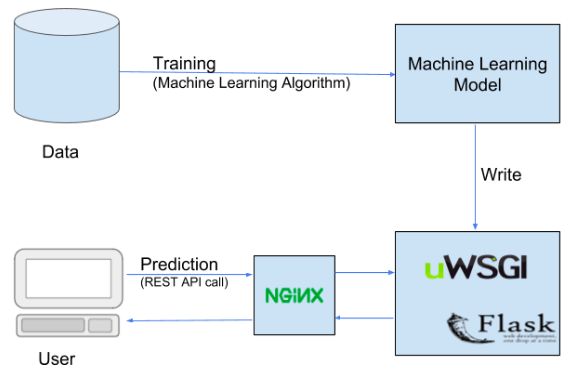

### Environment and tools
- scikit-learn
- pandas
- numpy
- flask

### Serializing/De-Serializing
In simple words serializing is a way to write a python object on the disk that can be transferred anywhere and later de-serialized (read) back by a python script.  

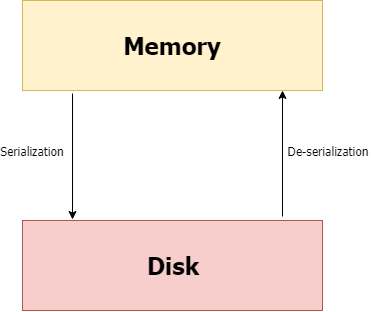

I converted the model which is in the form of a python object into a character stream using pickling. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.


In [7]:
#model.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

dataset = pd.read_csv('DE_4_sales.csv')

dataset['rate'].fillna(0, inplace=True)

dataset['sales_in_first_month'].fillna(dataset['sales_in_first_month'].mean(), inplace=True)

X = dataset.iloc[:, :3]

def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

X['rate'] = X['rate'].apply(lambda x : convert_to_int(x))

y = dataset.iloc[:, -1]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X, y)

pickle.dump(regressor, open('DE_4_model.pkl','wb'))

model = pickle.load(open('DE_4_model.pkl','rb'))
print(model.predict([[4, 300, 500]]))
print(model.predict([[5, 400, 300]]))

FileNotFoundError: [Errno 2] File DE_4_sales.csv does not exist: 'DE_4_sales.csv'

The next part was to make an API which receives sales details through GUI and computes the predicted sales value based on our model. For this I de- serialized the pickled model in the form of python object. I set the main page using index.html. On submitting the form values using POST request to /predict, we get the predicted sales value.  

The results can be shown by making another POST request to /results. It receives JSON inputs, uses the trained model to make a prediction and returns that prediction in JSON format which can be accessed through the API endpoint.

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

In [ ]:
#app.py

app = Flask(__name__)
model = pickle.load(open('DE_4_model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():

    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Sales should be $ {}'.format(output))

@app.route('/results',methods=['POST'])
def results():

    data = request.get_json(force=True)
    #data = request.json
    prediction = model.predict([np.array(list(data.values()))])

    output = prediction[0]
    return jsonify(output)

if __name__ == "__main__":
    app.run(debug=True)
    

Finally I used requests module to call APIs defined in app.py. It displays the returned sales value in the third month.

In [ ]:
#request.py
import requests

url = 'http://localhost:5000/results'
r = requests.post(url,json={"rate":5, "sales_in_first_month":200, "sales_in_second_month":400})

#print(r, r.text)
print(r.json())

### Results
Run the web application using this command.

In [ ]:
python app.py

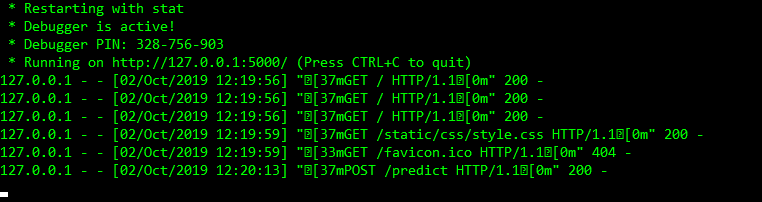

Open http://127.0.0.1:5000/ in your web-browser, and the GUI as shown below should appear.

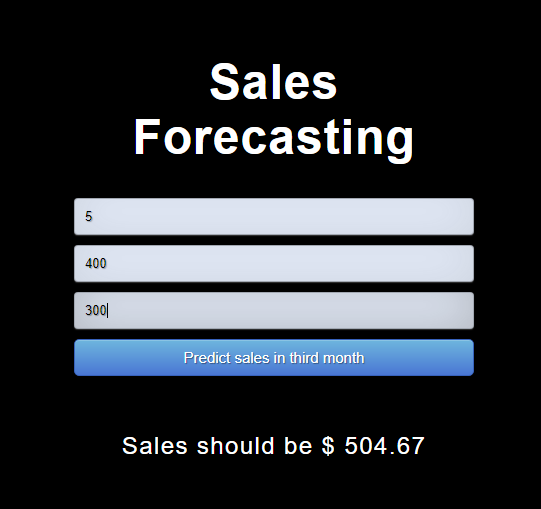

#### Example 3

In [ ]:
#model.py
# Import dependencies
import pandas as pd
import numpy as np

# Load the dataset in a dataframe object and include only four features as mentioned
url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(url)
include = ['Age', 'Sex', 'Embarked', 'Survived'] # Only four features
df_ = df[include]

# Data Preprocessing
categoricals = []
for col, col_type in df_.dtypes.iteritems():
    if col_type == 'O':
          categoricals.append(col)
    else:
          df_[col].fillna(0, inplace=True)

df_ohe = pd.get_dummies(df_, columns=categoricals, dummy_na=True)

# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
dependent_variable = 'Survived'
x = df_ohe[df_ohe.columns.difference([dependent_variable])]
y = df_ohe[dependent_variable]
lr = LogisticRegression()
lr.fit(x, y)

# Save your model
from sklearn.externals import joblib
joblib.dump(lr, 'model.pkl')
print("Model dumped!")

# Load the model that you just saved
lr = joblib.load('model.pkl')

# Saving the data columns from training
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

In [ ]:
#app.py
# Dependencies
from flask import Flask, request, jsonify
from sklearn.externals import joblib
import traceback
import pandas as pd
import numpy as np

# Your API definition
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if lr:
        try:
            json_ = request.json
            print(json_)
            query = pd.get_dummies(pd.DataFrame(json_))
            query = query.reindex(columns=model_columns, fill_value=0)

            prediction = list(lr.predict(query))

            return jsonify({'prediction': str(prediction)})

        except:

            return jsonify({'trace': traceback.format_exc()})
    else:
        print ('Train the model first')
        return ('No model here to use')

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345 # If you don't provide any port the port will be set to 12345

    lr = joblib.load("model.pkl") # Load "model.pkl"
    print ('Model loaded')
    model_columns = joblib.load("model_columns.pkl") # Load "model_columns.pkl"
    print ('Model columns loaded')

    app.run(port=port, debug=True)

In [ ]:
#request.py
import requests

url = 'http://127.0.0.1:12345/predict'
r = requests.post(url,json=[
    {"Age": 85, "Sex": "male", "Embarked": "S"},
    {"Age": 24, "Sex": '"female"', "Embarked": "C"},
    {"Age": 3, "Sex": "male", "Embarked": "C"},
    {"Age": 21, "Sex": "male", "Embarked": "S"}
])

print(r.json())